<a href="https://colab.research.google.com/github/YomnaElmousalami/AppleHealthData_Analysis/blob/main/Analyze_Sis_health_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
!pip install openpyxl
import pandas as pd
import xml.etree.ElementTree as ET
import os
from bs4 import BeautifulSoup
import dask.dataframe as dd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#Analyze the content in this folder

In [3]:
folder = "/content/drive/MyDrive/apple_health_export"
directory_files = os.listdir(folder)
for i in directory_files:
  print(i)

export.xml
electrocardiograms
export_cda.xml
workout-routes


#Work on the first file

In [4]:
file_1 = "/content/drive/MyDrive/apple_health_export/export.xml"

In [5]:
tree = ET.parse(file_1)
root = tree.getroot()
# Function to extract attributes as DataFrame
def extract_data(tag):
    data = []
    for elem in root.findall(tag):
        data.append(elem.attrib)
    return pd.DataFrame(data)

# Extract tables
export_date_df = extract_data("ExportDate")
me_df = extract_data("Me")
records_df = extract_data("Record")
workouts_df = extract_data("Workout")
activity_summary_df = extract_data("ActivitySummary")

#Make sure Each Table is Displayed Properly

In [6]:
export_date_df

,value
0,2025-02-26 19:39:28 -0500


In [7]:
me_df

,HKCharacteristicTypeIdentifierDateOfBirth,HKCharacteristicTypeIdentifierBiologicalSex,HKCharacteristicTypeIdentifierBloodType,HKCharacteristicTypeIdentifierFitzpatrickSkinType,HKCharacteristicTypeIdentifierCardioFitnessMedicationsUse
0,2007-01-25,HKBiologicalSexFemale,HKBloodTypeNotSet,HKFitzpatrickSkinTypeNotSet,None


In [8]:
records_df

,type,sourceName,sourceVersion,unit,creationDate,startDate,endDate,value,device
0,HKQuantityTypeIdentifierHeight,iPhone (2),16.6.1,ft,2023-09-17 10:41:20 -0500,2023-09-17 10:41:20 -0500,2023-09-17 10:41:20 -0500,5.25,NaN
1,HKQuantityTypeIdentifierHeight,Jannah’s Apple Watch,9.3,ft,2023-09-17 16:11:26 -0500,2023-09-17 16:11:26 -0500,2023-09-17 16:11:26 -0500,5.25,NaN
2,HKQuantityTypeIdentifierBodyMass,Health,11.2.6,lb,2018-04-01 13:08:42 -0500,2018-04-01 13:08:00 -0500,2018-04-01 13:08:00 -0500,120,NaN
3,HKQuantityTypeIdentifierBodyMass,Health,11.2.6,lb,2018-04-03 19:11:31 -0500,2018-04-03 19:11:00 -0500,2018-04-03 19:11:00 -0500,120,NaN
4,HKQuantityTypeIdentifierBodyMass,Health,11.2.6,lb,2018-04-05 21:03:57 -0500,2018-04-05 21:03:00 -0500,2018-04-05 21:03:00 -0500,120,NaN
...,...,...,...,...,...,...,...,...,...
911267,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Jannah’s Apple Watch,11.0,ms,2025-02-25 21:29:58 -0500,2025-02-25 21:28:57 -0500,2025-02-25 21:29:54 -0500,144.231,"<<HKDevice: 0x30186d040>, name:Apple Watch, ma..."
911268,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Jannah’s Apple Watch,11.0,ms,2025-02-26 06:45:04 -0500,2025-02-26 06:44:03 -0500,2025-02-26 06:45:03 -0500,120.072,"<<HKDevice: 0x30186d040>, name:Apple Watch, ma..."
911269,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Jannah’s Apple Watch,11.0,ms,2025-02-26 07:57:41 -0500,2025-02-26 07:56:40 -0500,2025-02-26 07:57:39 -0500,38.8269,"<<HKDevice: 0x30186d040>, name:Apple Watch, ma..."
911270,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Jannah’s Apple Watch,11.0,ms,2025-02-26 13:43:06 -0500,2025-02-26 13:42:05 -0500,2025-02-26 13:43:04 -0500,39.7098,"<<HKDevice: 0x30186d040>, name:Apple Watch, ma..."


In [9]:
workouts_df

,workoutActivityType,duration,durationUnit,sourceName,sourceVersion,creationDate,startDate,endDate,device
0,HKWorkoutActivityTypeOther,0,min,Health,11.3.1,2018-06-29 14:38:15 -0500,2018-06-29 14:37:00 -0500,2018-06-29 14:37:00 -0500,NaN
1,HKWorkoutActivityTypeWalking,34.62768211166064,min,Jannah’s Apple Watch,9.3,2023-09-17 17:26:39 -0500,2023-09-17 16:51:58 -0500,2023-09-17 17:26:35 -0500,"<<HKDevice: 0x30186e5d0>, name:Apple Watch, ma..."
2,HKWorkoutActivityTypeRunning,17.38285479942958,min,Jannah’s Apple Watch,9.3,2023-09-18 18:24:44 -0500,2023-09-18 18:07:19 -0500,2023-09-18 18:24:42 -0500,"<<HKDevice: 0x30186e5d0>, name:Apple Watch, ma..."
3,HKWorkoutActivityTypeRunning,11.51686753034592,min,Jannah’s Apple Watch,9.3,2023-09-21 15:01:49 -0500,2023-09-21 14:50:17 -0500,2023-09-21 15:01:48 -0500,"<<HKDevice: 0x30186e5d0>, name:Apple Watch, ma..."
4,HKWorkoutActivityTypeSwimming,6.07142174243927,min,Jannah’s Apple Watch,9.3,2023-09-26 15:56:23 -0500,2023-09-26 15:50:18 -0500,2023-09-26 15:56:22 -0500,"<<HKDevice: 0x30186e5d0>, name:Apple Watch, ma..."
...,...,...,...,...,...,...,...,...,...
241,HKWorkoutActivityTypeRunning,9.06705576578776,min,Jannah’s Apple Watch,10.6.1,2024-10-29 19:13:03 -0500,2024-10-29 19:03:58 -0500,2024-10-29 19:13:02 -0500,"<<HKDevice: 0x301810280>, name:Apple Watch, ma..."
242,HKWorkoutActivityTypeCooldown,28.62752670049667,min,Jannah’s Apple Watch,10.6.1,2024-10-29 19:41:48 -0500,2024-10-29 19:13:09 -0500,2024-10-29 19:41:47 -0500,"<<HKDevice: 0x301810280>, name:Apple Watch, ma..."
243,HKWorkoutActivityTypeSwimming,77.92724243203799,min,Jannah’s Apple Watch,11.0,2025-01-31 16:35:38 -0500,2025-01-31 15:17:39 -0500,2025-01-31 16:35:35 -0500,"<<HKDevice: 0x301800e10>, name:Apple Watch, ma..."
244,HKWorkoutActivityTypeSwimming,62.294687606891,min,Jannah’s Apple Watch,11.0,2025-02-03 16:31:21 -0500,2025-02-03 15:29:01 -0500,2025-02-03 16:31:19 -0500,"<<HKDevice: 0x301800e10>, name:Apple Watch, ma..."


In [10]:
activity_summary_df

,dateComponents,activeEnergyBurned,activeEnergyBurnedGoal,activeEnergyBurnedUnit,appleMoveTime,appleMoveTimeGoal,appleExerciseTime,appleExerciseTimeGoal,appleStandHours,appleStandHoursGoal
0,2022-09-20,79.454,240,Cal,0,0,0,0,0,0
1,2022-09-21,92.923,240,Cal,0,0,0,0,0,0
2,2022-09-22,151.574,240,Cal,0,0,0,0,0,0
3,2022-09-23,61.259,240,Cal,0,0,0,0,0,0
4,2022-09-24,62.416,240,Cal,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
797,2025-02-22,290.453,270,Cal,0,0,9,20,16,12
798,2025-02-23,250.286,270,Cal,0,0,5,20,13,12
799,2025-02-24,302.848,270,Cal,0,0,8,20,18,12
800,2025-02-25,255.962,270,Cal,0,0,11,20,14,12


#Analyze records_df first

In [11]:
records_df.head()

,type,sourceName,sourceVersion,unit,creationDate,startDate,endDate,value,device
0,HKQuantityTypeIdentifierHeight,iPhone (2),16.6.1,ft,2023-09-17 10:41:20 -0500,2023-09-17 10:41:20 -0500,2023-09-17 10:41:20 -0500,5.25,NaN
1,HKQuantityTypeIdentifierHeight,Jannah’s Apple Watch,9.3,ft,2023-09-17 16:11:26 -0500,2023-09-17 16:11:26 -0500,2023-09-17 16:11:26 -0500,5.25,NaN
2,HKQuantityTypeIdentifierBodyMass,Health,11.2.6,lb,2018-04-01 13:08:42 -0500,2018-04-01 13:08:00 -0500,2018-04-01 13:08:00 -0500,120,NaN
3,HKQuantityTypeIdentifierBodyMass,Health,11.2.6,lb,2018-04-03 19:11:31 -0500,2018-04-03 19:11:00 -0500,2018-04-03 19:11:00 -0500,120,NaN
4,HKQuantityTypeIdentifierBodyMass,Health,11.2.6,lb,2018-04-05 21:03:57 -0500,2018-04-05 21:03:00 -0500,2018-04-05 21:03:00 -0500,120,NaN


**remove duplicates**

In [12]:
records_df.drop_duplicates(inplace=True)

In [13]:
records_df.dtypes

,0
type,object
sourceName,object
sourceVersion,object
unit,object
creationDate,object
startDate,object
endDate,object
value,object
device,object


**see if null values are present**

In [14]:
records_df.isnull().sum()

,0
type,0
sourceName,0
sourceVersion,56
unit,20074
creationDate,0
startDate,0
endDate,0
value,0
device,203031


**remove sourceVersion column since its not important for me**

---

**also remove device column because sourceName is saying if its an iphone or apple watch**

In [15]:
records_df.drop('sourceVersion', axis=1, inplace=True)

In [16]:
records_df.drop('device', axis=1, inplace=True)

In [17]:
records_df.drop('creationDate', axis = 1, inplace = True)

**Dealing with unit null values**



In [18]:
#seeing rows with null values in unit column
records_df[records_df['unit'].isnull()]

,type,sourceName,unit,startDate,endDate,value
889381,HKCategoryTypeIdentifierSleepAnalysis,Clock,NaN,2016-10-14 23:22:55 -0500,2016-10-15 05:33:20 -0500,HKCategoryValueSleepAnalysisInBed
889382,HKCategoryTypeIdentifierSleepAnalysis,Clock,NaN,2016-10-15 05:35:32 -0500,2016-10-15 05:54:03 -0500,HKCategoryValueSleepAnalysisInBed
889383,HKCategoryTypeIdentifierSleepAnalysis,Clock,NaN,2016-10-15 21:00:00 -0500,2016-10-16 05:21:38 -0500,HKCategoryValueSleepAnalysisInBed
889384,HKCategoryTypeIdentifierSleepAnalysis,Clock,NaN,2016-10-15 21:00:00 -0500,2016-10-16 05:21:44 -0500,HKCategoryValueSleepAnalysisInBed
889385,HKCategoryTypeIdentifierSleepAnalysis,Clock,NaN,2016-10-16 05:24:32 -0500,2016-10-16 05:30:53 -0500,HKCategoryValueSleepAnalysisInBed
...,...,...,...,...,...,...
909450,HKCategoryTypeIdentifierAudioExposureEvent,Jannah’s Apple Watch,NaN,2025-02-03 15:27:37 -0500,2025-02-03 15:30:17 -0500,HKCategoryValueEnvironmentalAudioExposureEvent...
909451,HKCategoryTypeIdentifierAudioExposureEvent,Jannah’s Apple Watch,NaN,2025-02-06 15:01:56 -0500,2025-02-06 15:04:36 -0500,HKCategoryValueEnvironmentalAudioExposureEvent...
909452,HKCategoryTypeIdentifierAudioExposureEvent,Jannah’s Apple Watch,NaN,2025-02-06 15:35:53 -0500,2025-02-06 15:38:48 -0500,HKCategoryValueEnvironmentalAudioExposureEvent...
909453,HKCategoryTypeIdentifierAudioExposureEvent,Jannah’s Apple Watch,NaN,2025-02-07 15:19:54 -0500,2025-02-07 15:22:34 -0500,HKCategoryValueEnvironmentalAudioExposureEvent...


In [19]:
#determinng the column type where unit values are null
records_df['type'][records_df['unit'].isnull()].unique()

array(['HKCategoryTypeIdentifierSleepAnalysis',
       'HKCategoryTypeIdentifierAppleStandHour',
       'HKCategoryTypeIdentifierMenstrualFlow',
       'HKCategoryTypeIdentifierMindfulSession',
       'HKCategoryTypeIdentifierAudioExposureEvent'], dtype=object)

In [20]:
#identify rows for sleep analysis
records_df[records_df['type'] == 'HKCategoryTypeIdentifierSleepAnalysis']

,type,sourceName,unit,startDate,endDate,value
889381,HKCategoryTypeIdentifierSleepAnalysis,Clock,NaN,2016-10-14 23:22:55 -0500,2016-10-15 05:33:20 -0500,HKCategoryValueSleepAnalysisInBed
889382,HKCategoryTypeIdentifierSleepAnalysis,Clock,NaN,2016-10-15 05:35:32 -0500,2016-10-15 05:54:03 -0500,HKCategoryValueSleepAnalysisInBed
889383,HKCategoryTypeIdentifierSleepAnalysis,Clock,NaN,2016-10-15 21:00:00 -0500,2016-10-16 05:21:38 -0500,HKCategoryValueSleepAnalysisInBed
889384,HKCategoryTypeIdentifierSleepAnalysis,Clock,NaN,2016-10-15 21:00:00 -0500,2016-10-16 05:21:44 -0500,HKCategoryValueSleepAnalysisInBed
889385,HKCategoryTypeIdentifierSleepAnalysis,Clock,NaN,2016-10-16 05:24:32 -0500,2016-10-16 05:30:53 -0500,HKCategoryValueSleepAnalysisInBed
...,...,...,...,...,...,...
901010,HKCategoryTypeIdentifierSleepAnalysis,Jannah’s Apple Watch,NaN,2025-02-23 06:20:57 -0500,2025-02-23 06:21:57 -0500,HKCategoryValueSleepAnalysisAsleepCore
901011,HKCategoryTypeIdentifierSleepAnalysis,Jannah’s Apple Watch,NaN,2025-02-24 23:30:40 -0500,2025-02-25 01:57:40 -0500,HKCategoryValueSleepAnalysisAsleepUnspecified
901012,HKCategoryTypeIdentifierSleepAnalysis,Jannah’s Apple Watch,NaN,2025-02-25 03:02:56 -0500,2025-02-25 05:30:26 -0500,HKCategoryValueSleepAnalysisAsleepUnspecified
901013,HKCategoryTypeIdentifierSleepAnalysis,Jannah’s Apple Watch,NaN,2025-02-25 05:30:26 -0500,2025-02-25 05:30:56 -0500,HKCategoryValueSleepAnalysisAwake


In [21]:
records_df[records_df['type'] == 'HKCategoryTypeIdentifierSleepAnalysis'][['unit']]

,unit
889381,NaN
889382,NaN
889383,NaN
889384,NaN
889385,NaN
...,...
901010,NaN
901011,NaN
901012,NaN
901013,NaN


In [22]:
records_df.loc[records_df['type'] == 'HKCategoryTypeIdentifierSleepAnalysis', 'unit'] = 'night'

In [23]:
records_df[records_df['type'] == 'HKCategoryTypeIdentifierSleepAnalysis'][['unit']]

,unit
889381,night
889382,night
889383,night
889384,night
889385,night
...,...
901010,night
901011,night
901012,night
901013,night


**deal wth stand hour nulls**

In [24]:
records_df[records_df['type'] == 'HKCategoryTypeIdentifierAppleStandHour']

,type,sourceName,unit,startDate,endDate,value
901015,HKCategoryTypeIdentifierAppleStandHour,Jannah’s Apple Watch,NaN,2023-09-17 10:00:00 -0500,2023-09-17 11:00:00 -0500,HKCategoryValueAppleStandHourStood
901016,HKCategoryTypeIdentifierAppleStandHour,Jannah’s Apple Watch,NaN,2023-09-17 11:00:00 -0500,2023-09-17 12:00:00 -0500,HKCategoryValueAppleStandHourStood
901017,HKCategoryTypeIdentifierAppleStandHour,Jannah’s Apple Watch,NaN,2023-09-17 12:00:00 -0500,2023-09-17 13:00:00 -0500,HKCategoryValueAppleStandHourStood
901018,HKCategoryTypeIdentifierAppleStandHour,Jannah’s Apple Watch,NaN,2023-09-17 13:00:00 -0500,2023-09-17 14:00:00 -0500,HKCategoryValueAppleStandHourIdle
901019,HKCategoryTypeIdentifierAppleStandHour,Jannah’s Apple Watch,NaN,2023-09-17 14:00:00 -0500,2023-09-17 15:00:00 -0500,HKCategoryValueAppleStandHourIdle
...,...,...,...,...,...,...
909313,HKCategoryTypeIdentifierAppleStandHour,Jannah’s Apple Watch,NaN,2025-02-26 14:00:00 -0500,2025-02-26 15:00:00 -0500,HKCategoryValueAppleStandHourStood
909314,HKCategoryTypeIdentifierAppleStandHour,Jannah’s Apple Watch,NaN,2025-02-26 15:00:00 -0500,2025-02-26 16:00:00 -0500,HKCategoryValueAppleStandHourStood
909315,HKCategoryTypeIdentifierAppleStandHour,Jannah’s Apple Watch,NaN,2025-02-26 16:00:00 -0500,2025-02-26 17:00:00 -0500,HKCategoryValueAppleStandHourStood
909316,HKCategoryTypeIdentifierAppleStandHour,Jannah’s Apple Watch,NaN,2025-02-26 17:00:00 -0500,2025-02-26 18:00:00 -0500,HKCategoryValueAppleStandHourStood


In [25]:
records_df[records_df['type'] == 'HKCategoryTypeIdentifierAppleStandHour']['value'].unique()

array(['HKCategoryValueAppleStandHourStood',
       'HKCategoryValueAppleStandHourIdle'], dtype=object)

In [26]:
records_df[records_df['type'] == 'HKCategoryTypeIdentifierAppleStandHour'][['type', 'unit']]

,type,unit
901015,HKCategoryTypeIdentifierAppleStandHour,NaN
901016,HKCategoryTypeIdentifierAppleStandHour,NaN
901017,HKCategoryTypeIdentifierAppleStandHour,NaN
901018,HKCategoryTypeIdentifierAppleStandHour,NaN
901019,HKCategoryTypeIdentifierAppleStandHour,NaN
...,...,...
909313,HKCategoryTypeIdentifierAppleStandHour,NaN
909314,HKCategoryTypeIdentifierAppleStandHour,NaN
909315,HKCategoryTypeIdentifierAppleStandHour,NaN
909316,HKCategoryTypeIdentifierAppleStandHour,NaN


In [27]:
records_df[records_df['type'] == 'HKCategoryTypeIdentifierAppleStandHour']['unit'].unique()

array([nan], dtype=object)

In [28]:
records_df.loc[records_df['type'] == 'HKCategoryTypeIdentifierAppleStandHour', 'unit'] = 'boolean'

**deal with nulls in menstral flow**

In [29]:
records_df[records_df['type'] == 'HKCategoryTypeIdentifierMenstrualFlow']

,type,sourceName,unit,startDate,endDate,value
909318,HKCategoryTypeIdentifierMenstrualFlow,Health,NaN,2023-12-07 12:00:00 -0500,2023-12-07 12:00:00 -0500,HKCategoryValueVaginalBleedingUnspecified
909319,HKCategoryTypeIdentifierMenstrualFlow,Health,NaN,2023-12-08 12:00:00 -0500,2023-12-08 12:00:00 -0500,HKCategoryValueVaginalBleedingUnspecified
909320,HKCategoryTypeIdentifierMenstrualFlow,Health,NaN,2023-12-09 12:00:00 -0500,2023-12-09 12:00:00 -0500,HKCategoryValueVaginalBleedingUnspecified
909321,HKCategoryTypeIdentifierMenstrualFlow,Health,NaN,2023-12-10 12:00:00 -0500,2023-12-10 12:00:00 -0500,HKCategoryValueVaginalBleedingUnspecified
909322,HKCategoryTypeIdentifierMenstrualFlow,Health,NaN,2023-12-11 12:00:00 -0500,2023-12-11 12:00:00 -0500,HKCategoryValueVaginalBleedingUnspecified
...,...,...,...,...,...,...
909423,HKCategoryTypeIdentifierMenstrualFlow,Health,NaN,2025-02-05 12:00:00 -0500,2025-02-05 12:00:00 -0500,HKCategoryValueVaginalBleedingUnspecified
909424,HKCategoryTypeIdentifierMenstrualFlow,Health,NaN,2025-02-06 12:00:00 -0500,2025-02-06 12:00:00 -0500,HKCategoryValueVaginalBleedingUnspecified
909425,HKCategoryTypeIdentifierMenstrualFlow,Health,NaN,2025-02-07 12:00:00 -0500,2025-02-07 12:00:00 -0500,HKCategoryValueVaginalBleedingUnspecified
909426,HKCategoryTypeIdentifierMenstrualFlow,Health,NaN,2025-02-08 12:00:00 -0500,2025-02-08 12:00:00 -0500,HKCategoryValueVaginalBleedingUnspecified


In [30]:
records_df[records_df['type'] == 'HKCategoryTypeIdentifierMenstrualFlow']['value'].unique()

array(['HKCategoryValueVaginalBleedingUnspecified',
       'HKCategoryValueVaginalBleedingMedium',
       'HKCategoryValueVaginalBleedingHeavy',
       'HKCategoryValueVaginalBleedingLight',
       'HKCategoryValueVaginalBleedingNone'], dtype=object)

In [31]:
records_df[records_df['type'] == 'HKCategoryTypeIdentifierMenstrualFlow']['unit'].unique()

array([nan], dtype=object)

In [32]:
records_df.loc[records_df['type'] == 'HKCategoryTypeIdentifierMenstrualFlow', 'unit'] = 'multiclass'

**deal with mindful session nulls, Note: value for this will be changed later**

In [33]:
records_df[records_df['type'] == 'HKCategoryTypeIdentifierMindfulSession']

,type,sourceName,unit,startDate,endDate,value
909428,HKCategoryTypeIdentifierMindfulSession,Jannah’s Apple Watch,NaN,2024-10-10 19:04:20 -0500,2024-10-10 19:09:20 -0500,HKCategoryValueNotApplicable
909429,HKCategoryTypeIdentifierMindfulSession,Jannah’s Apple Watch,NaN,2024-10-10 19:10:09 -0500,2024-10-10 19:15:09 -0500,HKCategoryValueNotApplicable


In [34]:
records_df.loc[records_df['type'] == 'HKCategoryTypeIdentifierMindfulSession', 'unit'] = 'hours'

**deal with audio exposure event nulls**

In [35]:
records_df[records_df['type'] == 'HKCategoryTypeIdentifierAudioExposureEvent']

,type,sourceName,unit,startDate,endDate,value
909430,HKCategoryTypeIdentifierAudioExposureEvent,Jannah’s Apple Watch,NaN,2023-09-19 15:23:46 -0500,2023-09-19 15:26:31 -0500,HKCategoryValueEnvironmentalAudioExposureEvent...
909431,HKCategoryTypeIdentifierAudioExposureEvent,Jannah’s Apple Watch,NaN,2023-09-26 15:18:22 -0500,2023-09-26 15:21:02 -0500,HKCategoryValueEnvironmentalAudioExposureEvent...
909432,HKCategoryTypeIdentifierAudioExposureEvent,Jannah’s Apple Watch,NaN,2023-12-23 17:20:04 -0500,2023-12-23 17:22:59 -0500,HKCategoryValueEnvironmentalAudioExposureEvent...
909433,HKCategoryTypeIdentifierAudioExposureEvent,Jannah’s Apple Watch,NaN,2024-02-26 09:59:20 -0500,2024-02-26 10:02:15 -0500,HKCategoryValueEnvironmentalAudioExposureEvent...
909434,HKCategoryTypeIdentifierAudioExposureEvent,Jannah’s Apple Watch,NaN,2024-03-12 15:51:20 -0500,2024-03-12 15:54:10 -0500,HKCategoryValueEnvironmentalAudioExposureEvent...
909435,HKCategoryTypeIdentifierAudioExposureEvent,Jannah’s Apple Watch,NaN,2024-04-14 14:23:31 -0500,2024-04-14 14:26:21 -0500,HKCategoryValueEnvironmentalAudioExposureEvent...
909436,HKCategoryTypeIdentifierAudioExposureEvent,Jannah’s Apple Watch,NaN,2024-04-23 16:27:46 -0500,2024-04-23 16:30:41 -0500,HKCategoryValueEnvironmentalAudioExposureEvent...
909437,HKCategoryTypeIdentifierAudioExposureEvent,Jannah’s Apple Watch,NaN,2024-05-19 12:30:46 -0500,2024-05-19 12:33:41 -0500,HKCategoryValueEnvironmentalAudioExposureEvent...
909438,HKCategoryTypeIdentifierAudioExposureEvent,Jannah’s Apple Watch,NaN,2024-06-19 16:52:24 -0500,2024-06-19 16:55:04 -0500,HKCategoryValueEnvironmentalAudioExposureEvent...
909439,HKCategoryTypeIdentifierAudioExposureEvent,Jannah’s Apple Watch,NaN,2024-06-19 17:25:59 -0500,2024-06-19 17:28:54 -0500,HKCategoryValueEnvironmentalAudioExposureEvent...


In [36]:
records_df[records_df['type'] == 'HKCategoryTypeIdentifierAudioExposureEvent']['unit'].unique()

array([nan], dtype=object)

In [37]:
records_df.loc[records_df['type'] == 'HKCategoryTypeIdentifierAudioExposure', 'unit'] = 'dB'

In [38]:
records_df.isnull().sum()

,0
type,0
sourceName,0
unit,25
startDate,0
endDate,0
value,0


In [39]:
records_df[records_df['unit'].isnull()]['type'].unique()

array(['HKCategoryTypeIdentifierAudioExposureEvent'], dtype=object)

#Transform date columns from objects to date values, hour values will be transformed later since each value property is different and I want to make sure I don't fuck this up.

In [40]:
records_df['startDate'] = pd.to_datetime(records_df['startDate']).dt.tz_localize(None)
records_df['endDate'] = pd.to_datetime(records_df['endDate']).dt.tz_localize(None)
records_df

,type,sourceName,unit,startDate,endDate,value
0,HKQuantityTypeIdentifierHeight,iPhone (2),ft,2023-09-17 10:41:20,2023-09-17 10:41:20,5.25
1,HKQuantityTypeIdentifierHeight,Jannah’s Apple Watch,ft,2023-09-17 16:11:26,2023-09-17 16:11:26,5.25
2,HKQuantityTypeIdentifierBodyMass,Health,lb,2018-04-01 13:08:00,2018-04-01 13:08:00,120
3,HKQuantityTypeIdentifierBodyMass,Health,lb,2018-04-03 19:11:00,2018-04-03 19:11:00,120
4,HKQuantityTypeIdentifierBodyMass,Health,lb,2018-04-05 21:03:00,2018-04-05 21:03:00,120
...,...,...,...,...,...,...
911267,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Jannah’s Apple Watch,ms,2025-02-25 21:28:57,2025-02-25 21:29:54,144.231
911268,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Jannah’s Apple Watch,ms,2025-02-26 06:44:03,2025-02-26 06:45:03,120.072
911269,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Jannah’s Apple Watch,ms,2025-02-26 07:56:40,2025-02-26 07:57:39,38.8269
911270,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Jannah’s Apple Watch,ms,2025-02-26 13:42:05,2025-02-26 13:43:04,39.7098


In [41]:
#create seperate columns for start and end time year, month, and days
records_df['startYear'] = records_df['startDate'].dt.year
records_df['startMonth'] = records_df['startDate'].dt.month
records_df['startDay'] = records_df['startDate'].dt.day

records_df['endYear'] = records_df['endDate'].dt.year
records_df['endMonth'] = records_df['endDate'].dt.month
records_df['endDay'] = records_df['endDate'].dt.day
records_df

,type,sourceName,unit,startDate,endDate,value,startYear,startMonth,startDay,endYear,endMonth,endDay
0,HKQuantityTypeIdentifierHeight,iPhone (2),ft,2023-09-17 10:41:20,2023-09-17 10:41:20,5.25,2023,9,17,2023,9,17
1,HKQuantityTypeIdentifierHeight,Jannah’s Apple Watch,ft,2023-09-17 16:11:26,2023-09-17 16:11:26,5.25,2023,9,17,2023,9,17
2,HKQuantityTypeIdentifierBodyMass,Health,lb,2018-04-01 13:08:00,2018-04-01 13:08:00,120,2018,4,1,2018,4,1
3,HKQuantityTypeIdentifierBodyMass,Health,lb,2018-04-03 19:11:00,2018-04-03 19:11:00,120,2018,4,3,2018,4,3
4,HKQuantityTypeIdentifierBodyMass,Health,lb,2018-04-05 21:03:00,2018-04-05 21:03:00,120,2018,4,5,2018,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
911267,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Jannah’s Apple Watch,ms,2025-02-25 21:28:57,2025-02-25 21:29:54,144.231,2025,2,25,2025,2,25
911268,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Jannah’s Apple Watch,ms,2025-02-26 06:44:03,2025-02-26 06:45:03,120.072,2025,2,26,2025,2,26
911269,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Jannah’s Apple Watch,ms,2025-02-26 07:56:40,2025-02-26 07:57:39,38.8269,2025,2,26,2025,2,26
911270,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Jannah’s Apple Watch,ms,2025-02-26 13:42:05,2025-02-26 13:43:04,39.7098,2025,2,26,2025,2,26


#Split the types into different tables to make analysis easier???

In [42]:
records_df['type'].unique()

array(['HKQuantityTypeIdentifierHeight',
       'HKQuantityTypeIdentifierBodyMass',
       'HKQuantityTypeIdentifierHeartRate',
       'HKQuantityTypeIdentifierRespiratoryRate',
       'HKQuantityTypeIdentifierStepCount',
       'HKQuantityTypeIdentifierDistanceWalkingRunning',
       'HKQuantityTypeIdentifierBasalEnergyBurned',
       'HKQuantityTypeIdentifierActiveEnergyBurned',
       'HKQuantityTypeIdentifierFlightsClimbed',
       'HKQuantityTypeIdentifierAppleExerciseTime',
       'HKQuantityTypeIdentifierDistanceCycling',
       'HKQuantityTypeIdentifierDistanceSwimming',
       'HKQuantityTypeIdentifierSwimmingStrokeCount',
       'HKQuantityTypeIdentifierRestingHeartRate',
       'HKQuantityTypeIdentifierVO2Max',
       'HKQuantityTypeIdentifierWalkingHeartRateAverage',
       'HKQuantityTypeIdentifierEnvironmentalAudioExposure',
       'HKQuantityTypeIdentifierHeadphoneAudioExposure',
       'HKQuantityTypeIdentifierWalkingDoubleSupportPercentage',
       'HKQuantityTypeIdent

**create height table**

In [43]:
height= records_df[records_df['type'] == 'HKQuantityTypeIdentifierHeight']
height

,type,sourceName,unit,startDate,endDate,value,startYear,startMonth,startDay,endYear,endMonth,endDay
0,HKQuantityTypeIdentifierHeight,iPhone (2),ft,2023-09-17 10:41:20,2023-09-17 10:41:20,5.25,2023,9,17,2023,9,17
1,HKQuantityTypeIdentifierHeight,Jannah’s Apple Watch,ft,2023-09-17 16:11:26,2023-09-17 16:11:26,5.25,2023,9,17,2023,9,17


**create body mass table**

In [44]:
body_mass = records_df[records_df['type'] == 'HKQuantityTypeIdentifierBodyMass']
body_mass

,type,sourceName,unit,startDate,endDate,value,startYear,startMonth,startDay,endYear,endMonth,endDay
2,HKQuantityTypeIdentifierBodyMass,Health,lb,2018-04-01 13:08:00,2018-04-01 13:08:00,120,2018,4,1,2018,4,1
3,HKQuantityTypeIdentifierBodyMass,Health,lb,2018-04-03 19:11:00,2018-04-03 19:11:00,120,2018,4,3,2018,4,3
4,HKQuantityTypeIdentifierBodyMass,Health,lb,2018-04-05 21:03:00,2018-04-05 21:03:00,120,2018,4,5,2018,4,5
5,HKQuantityTypeIdentifierBodyMass,Health,lb,2018-04-06 20:34:00,2018-04-06 20:34:00,120,2018,4,6,2018,4,6
6,HKQuantityTypeIdentifierBodyMass,Health,lb,2018-04-04 21:43:00,2018-04-04 21:43:00,120,2018,4,4,2018,4,4
7,HKQuantityTypeIdentifierBodyMass,Health,lb,2018-04-02 21:44:00,2018-04-02 21:44:00,120,2018,4,2,2018,4,2
8,HKQuantityTypeIdentifierBodyMass,Health,lb,2018-04-07 20:53:00,2018-04-07 20:53:00,120,2018,4,7,2018,4,7
9,HKQuantityTypeIdentifierBodyMass,Health,lb,2021-08-15 18:08:28,2021-08-15 18:08:28,99.9999,2021,8,15,2021,8,15
10,HKQuantityTypeIdentifierBodyMass,iPhone (2),lb,2022-09-20 09:55:06,2022-09-20 09:55:06,110,2022,9,20,2022,9,20
11,HKQuantityTypeIdentifierBodyMass,iPhone (2),lb,2023-09-17 10:41:20,2023-09-17 10:41:20,110,2023,9,17,2023,9,17


**create heart rate table**

In [45]:
heart_rate = records_df[records_df['type'] == 'HKQuantityTypeIdentifierHeartRate']
heart_rate

,type,sourceName,unit,startDate,endDate,value,startYear,startMonth,startDay,endYear,endMonth,endDay
13,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2023-09-17 10:42:00,2023-09-17 10:42:00,71,2023,9,17,2023,9,17
14,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2023-09-17 10:45:47,2023-09-17 10:45:47,104,2023,9,17,2023,9,17
15,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2023-09-17 10:47:40,2023-09-17 10:47:40,63.4445,2023,9,17,2023,9,17
16,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2023-09-17 10:47:48,2023-09-17 10:47:48,55,2023,9,17,2023,9,17
17,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2023-09-17 10:56:18,2023-09-17 10:56:18,106,2023,9,17,2023,9,17
...,...,...,...,...,...,...,...,...,...,...,...,...
102019,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2025-02-26 18:21:35,2025-02-26 18:21:35,80,2025,2,26,2025,2,26
102020,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2025-02-26 18:26:21,2025-02-26 18:26:21,80,2025,2,26,2025,2,26
102021,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2025-02-26 18:31:44,2025-02-26 18:31:44,77,2025,2,26,2025,2,26
102022,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2025-02-26 18:34:00,2025-02-26 18:34:00,79,2025,2,26,2025,2,26


**create respritory rate table**

In [46]:
respritory_rate = records_df[records_df['type'] == 'HKQuantityTypeIdentifierRespiratoryRate']
respritory_rate

,type,sourceName,unit,startDate,endDate,value,startYear,startMonth,startDay,endYear,endMonth,endDay
102024,HKQuantityTypeIdentifierRespiratoryRate,Jannah’s Apple Watch,count/min,2025-01-26 23:20:52,2025-01-26 23:20:52,24,2025,1,26,2025,1,26
102025,HKQuantityTypeIdentifierRespiratoryRate,Jannah’s Apple Watch,count/min,2025-01-26 23:32:22,2025-01-26 23:32:22,23,2025,1,26,2025,1,26
102026,HKQuantityTypeIdentifierRespiratoryRate,Jannah’s Apple Watch,count/min,2025-01-26 23:37:22,2025-01-26 23:37:22,23,2025,1,26,2025,1,26
102027,HKQuantityTypeIdentifierRespiratoryRate,Jannah’s Apple Watch,count/min,2025-01-26 23:51:52,2025-01-26 23:51:52,14,2025,1,26,2025,1,26
102028,HKQuantityTypeIdentifierRespiratoryRate,Jannah’s Apple Watch,count/min,2025-01-27 00:02:22,2025-01-27 00:02:22,16,2025,1,27,2025,1,27
...,...,...,...,...,...,...,...,...,...,...,...,...
102987,HKQuantityTypeIdentifierRespiratoryRate,Jannah’s Apple Watch,count/min,2025-02-23 05:28:08,2025-02-23 05:28:08,15,2025,2,23,2025,2,23
102988,HKQuantityTypeIdentifierRespiratoryRate,Jannah’s Apple Watch,count/min,2025-02-23 05:38:08,2025-02-23 05:38:08,15,2025,2,23,2025,2,23
102989,HKQuantityTypeIdentifierRespiratoryRate,Jannah’s Apple Watch,count/min,2025-02-23 05:52:09,2025-02-23 05:52:09,15.5,2025,2,23,2025,2,23
102990,HKQuantityTypeIdentifierRespiratoryRate,Jannah’s Apple Watch,count/min,2025-02-23 06:04:09,2025-02-23 06:04:09,16,2025,2,23,2025,2,23


**create step count table**

In [47]:
step_count = records_df[records_df['type'] == 'HKQuantityTypeIdentifierStepCount']
step_count

,type,sourceName,unit,startDate,endDate,value,startYear,startMonth,startDay,endYear,endMonth,endDay
102992,HKQuantityTypeIdentifierStepCount,iPhone,count,2018-02-20 21:06:51,2018-02-20 21:16:15,55,2018,2,20,2018,2,20
102993,HKQuantityTypeIdentifierStepCount,iPhone,count,2018-02-21 07:35:04,2018-02-21 07:38:28,8,2018,2,21,2018,2,21
102994,HKQuantityTypeIdentifierStepCount,iPhone,count,2018-02-21 14:44:13,2018-02-21 14:53:54,24,2018,2,21,2018,2,21
102995,HKQuantityTypeIdentifierStepCount,iPhone,count,2018-02-21 14:53:54,2018-02-21 15:03:35,266,2018,2,21,2018,2,21
102996,HKQuantityTypeIdentifierStepCount,iPhone,count,2018-02-21 15:03:35,2018-02-21 15:13:25,44,2018,2,21,2018,2,21
...,...,...,...,...,...,...,...,...,...,...,...,...
194930,HKQuantityTypeIdentifierStepCount,Jannah’s Apple Watch,count,2025-02-26 18:59:31,2025-02-26 18:59:38,3,2025,2,26,2025,2,26
194931,HKQuantityTypeIdentifierStepCount,Jannah’s Apple Watch,count,2025-02-26 19:00:01,2025-02-26 19:00:53,16,2025,2,26,2025,2,26
194932,HKQuantityTypeIdentifierStepCount,Jannah’s Apple Watch,count,2025-02-26 19:01:34,2025-02-26 19:01:36,4,2025,2,26,2025,2,26
194933,HKQuantityTypeIdentifierStepCount,Jannah’s Apple Watch,count,2025-02-26 19:02:50,2025-02-26 19:02:55,22,2025,2,26,2025,2,26


**distance walking/running table**

In [48]:
runWalk = records_df[records_df['type'] == 'HKQuantityTypeIdentifierDistanceWalkingRunning']
runWalk

,type,sourceName,unit,startDate,endDate,value,startYear,startMonth,startDay,endYear,endMonth,endDay
194935,HKQuantityTypeIdentifierDistanceWalkingRunning,iPhone,mi,2018-02-20 21:06:51,2018-02-20 21:16:15,0.0243515,2018,2,20,2018,2,20
194936,HKQuantityTypeIdentifierDistanceWalkingRunning,iPhone,mi,2018-02-21 07:35:04,2018-02-21 07:38:28,0.00233636,2018,2,21,2018,2,21
194937,HKQuantityTypeIdentifierDistanceWalkingRunning,iPhone,mi,2018-02-21 14:44:13,2018-02-21 14:53:54,0.00850036,2018,2,21,2018,2,21
194938,HKQuantityTypeIdentifierDistanceWalkingRunning,iPhone,mi,2018-02-21 14:53:54,2018-02-21 15:03:35,0.0956539,2018,2,21,2018,2,21
194939,HKQuantityTypeIdentifierDistanceWalkingRunning,iPhone,mi,2018-02-21 15:03:35,2018-02-21 15:13:25,0.0158574,2018,2,21,2018,2,21
...,...,...,...,...,...,...,...,...,...,...,...,...
302573,HKQuantityTypeIdentifierDistanceWalkingRunning,Jannah’s Apple Watch,mi,2025-02-26 18:59:31,2025-02-26 18:59:38,0.00127272,2025,2,26,2025,2,26
302574,HKQuantityTypeIdentifierDistanceWalkingRunning,Jannah’s Apple Watch,mi,2025-02-26 19:00:01,2025-02-26 19:00:53,0.00678784,2025,2,26,2025,2,26
302575,HKQuantityTypeIdentifierDistanceWalkingRunning,Jannah’s Apple Watch,mi,2025-02-26 19:01:34,2025-02-26 19:01:36,0.00169696,2025,2,26,2025,2,26
302576,HKQuantityTypeIdentifierDistanceWalkingRunning,Jannah’s Apple Watch,mi,2025-02-26 19:02:50,2025-02-26 19:02:55,0.00977421,2025,2,26,2025,2,26


**basal energy table**

In [49]:
basalEnergy = records_df[records_df['type'] == 'HKQuantityTypeIdentifierBasalEnergyBurned']
basalEnergy

,type,sourceName,unit,startDate,endDate,value,startYear,startMonth,startDay,endYear,endMonth,endDay
302578,HKQuantityTypeIdentifierBasalEnergyBurned,iPhone (2),Cal,2022-09-19 08:52:15,2022-09-19 09:14:26,19.008,2022,9,19,2022,9,19
302579,HKQuantityTypeIdentifierBasalEnergyBurned,iPhone (2),Cal,2022-09-19 09:14:26,2022-09-19 09:35:15,17.816,2022,9,19,2022,9,19
302580,HKQuantityTypeIdentifierBasalEnergyBurned,iPhone (2),Cal,2022-09-19 09:35:15,2022-09-19 09:50:50,13.203,2022,9,19,2022,9,19
302581,HKQuantityTypeIdentifierBasalEnergyBurned,iPhone (2),Cal,2022-09-19 09:50:50,2022-09-19 10:05:52,12.347,2022,9,19,2022,9,19
302582,HKQuantityTypeIdentifierBasalEnergyBurned,iPhone (2),Cal,2022-09-19 10:05:52,2022-09-19 10:11:43,5.011,2022,9,19,2022,9,19
...,...,...,...,...,...,...,...,...,...,...,...,...
427425,HKQuantityTypeIdentifierBasalEnergyBurned,Jannah’s Apple Watch,Cal,2025-02-26 18:43:56,2025-02-26 18:59:18,13.735,2025,2,26,2025,2,26
427426,HKQuantityTypeIdentifierBasalEnergyBurned,Jannah’s Apple Watch,Cal,2025-02-26 18:59:18,2025-02-26 18:59:28,0.184,2025,2,26,2025,2,26
427427,HKQuantityTypeIdentifierBasalEnergyBurned,Jannah’s Apple Watch,Cal,2025-02-26 18:59:28,2025-02-26 19:14:29,14.868,2025,2,26,2025,2,26
427428,HKQuantityTypeIdentifierBasalEnergyBurned,Jannah’s Apple Watch,Cal,2025-02-26 19:14:29,2025-02-26 19:15:00,0.489,2025,2,26,2025,2,26


**active energy table**

In [50]:
activeEnergy = records_df[records_df['type'] == 'HKQuantityTypeIdentifierActiveEnergyBurned']
activeEnergy

,type,sourceName,unit,startDate,endDate,value,startYear,startMonth,startDay,endYear,endMonth,endDay
427430,HKQuantityTypeIdentifierActiveEnergyBurned,iPhone (2),Cal,2022-09-19 09:14:26,2022-09-19 09:22:12,1.857,2022,9,19,2022,9,19
427431,HKQuantityTypeIdentifierActiveEnergyBurned,iPhone (2),Cal,2022-09-19 09:50:50,2022-09-19 09:59:59,0.87,2022,9,19,2022,9,19
427432,HKQuantityTypeIdentifierActiveEnergyBurned,iPhone (2),Cal,2022-09-19 11:37:01,2022-09-19 11:38:22,1.196,2022,9,19,2022,9,19
427433,HKQuantityTypeIdentifierActiveEnergyBurned,iPhone (2),Cal,2022-09-19 13:04:33,2022-09-19 13:14:28,7.825,2022,9,19,2022,9,19
427434,HKQuantityTypeIdentifierActiveEnergyBurned,iPhone (2),Cal,2022-09-19 13:15:01,2022-09-19 13:25:04,10.343,2022,9,19,2022,9,19
...,...,...,...,...,...,...,...,...,...,...,...,...
594135,HKQuantityTypeIdentifierActiveEnergyBurned,Jannah’s Apple Watch,Cal,2025-02-26 19:06:59,2025-02-26 19:08:00,0.2,2025,2,26,2025,2,26
594136,HKQuantityTypeIdentifierActiveEnergyBurned,Jannah’s Apple Watch,Cal,2025-02-26 19:08:31,2025-02-26 19:08:51,0.062,2025,2,26,2025,2,26
594137,HKQuantityTypeIdentifierActiveEnergyBurned,Jannah’s Apple Watch,Cal,2025-02-26 19:08:51,2025-02-26 19:17:44,1.229,2025,2,26,2025,2,26
594138,HKQuantityTypeIdentifierActiveEnergyBurned,Jannah’s Apple Watch,Cal,2025-02-26 19:20:28,2025-02-26 19:20:58,0.092,2025,2,26,2025,2,26


**flights climbed table**

In [51]:
flightsClimbed = records_df[records_df['type'] == 'HKQuantityTypeIdentifierFlightsClimbed']
flightsClimbed

,type,sourceName,unit,startDate,endDate,value,startYear,startMonth,startDay,endYear,endMonth,endDay
594140,HKQuantityTypeIdentifierFlightsClimbed,iPhone (2),count,2021-03-17 09:19:53,2021-03-17 09:19:56,1,2021,3,17,2021,3,17
594141,HKQuantityTypeIdentifierFlightsClimbed,iPhone (2),count,2021-03-28 14:04:16,2021-03-28 14:04:18,1,2021,3,28,2021,3,28
594142,HKQuantityTypeIdentifierFlightsClimbed,iPhone (2),count,2021-04-12 07:14:49,2021-04-12 07:14:52,1,2021,4,12,2021,4,12
594143,HKQuantityTypeIdentifierFlightsClimbed,iPhone (2),count,2021-04-12 12:21:52,2021-04-12 12:22:05,2,2021,4,12,2021,4,12
594144,HKQuantityTypeIdentifierFlightsClimbed,iPhone (2),count,2021-04-13 07:04:13,2021-04-13 07:04:16,1,2021,4,13,2021,4,13
...,...,...,...,...,...,...,...,...,...,...,...,...
596678,HKQuantityTypeIdentifierFlightsClimbed,Jannah’s Apple Watch,count,2025-02-25 09:24:37,2025-02-25 09:24:40,1,2025,2,25,2025,2,25
596679,HKQuantityTypeIdentifierFlightsClimbed,Jannah’s Apple Watch,count,2025-02-25 10:26:23,2025-02-25 10:26:26,1,2025,2,25,2025,2,25
596680,HKQuantityTypeIdentifierFlightsClimbed,iPhone (2),count,2025-02-25 10:26:22,2025-02-25 10:26:24,1,2025,2,25,2025,2,25
596681,HKQuantityTypeIdentifierFlightsClimbed,iPhone (2),count,2025-02-26 12:34:26,2025-02-26 12:34:29,1,2025,2,26,2025,2,26


**create exercise time table**

In [52]:
exerciseTime = records_df[records_df['type'] == 'HKQuantityTypeIdentifierAppleExerciseTime']
exerciseTime

,type,sourceName,unit,startDate,endDate,value,startYear,startMonth,startDay,endYear,endMonth,endDay
596683,HKQuantityTypeIdentifierAppleExerciseTime,Jannah’s Apple Watch,min,2023-09-17 11:09:00,2023-09-17 11:10:00,1,2023,9,17,2023,9,17
596684,HKQuantityTypeIdentifierAppleExerciseTime,Jannah’s Apple Watch,min,2023-09-17 17:01:00,2023-09-17 17:02:00,1,2023,9,17,2023,9,17
596685,HKQuantityTypeIdentifierAppleExerciseTime,Jannah’s Apple Watch,min,2023-09-17 16:58:57,2023-09-17 16:59:57,1,2023,9,17,2023,9,17
596686,HKQuantityTypeIdentifierAppleExerciseTime,Jannah’s Apple Watch,min,2023-09-17 16:59:00,2023-09-17 17:00:00,1,2023,9,17,2023,9,17
596687,HKQuantityTypeIdentifierAppleExerciseTime,Jannah’s Apple Watch,min,2023-09-17 17:00:00,2023-09-17 17:01:00,1,2023,9,17,2023,9,17
...,...,...,...,...,...,...,...,...,...,...,...,...
606256,HKQuantityTypeIdentifierAppleExerciseTime,Jannah’s Apple Watch,min,2025-02-25 18:20:00,2025-02-25 18:21:00,1,2025,2,25,2025,2,25
606257,HKQuantityTypeIdentifierAppleExerciseTime,Jannah’s Apple Watch,min,2025-02-26 08:20:00,2025-02-26 08:21:00,1,2025,2,26,2025,2,26
606258,HKQuantityTypeIdentifierAppleExerciseTime,Jannah’s Apple Watch,min,2025-02-26 12:33:00,2025-02-26 12:34:00,1,2025,2,26,2025,2,26
606259,HKQuantityTypeIdentifierAppleExerciseTime,Jannah’s Apple Watch,min,2025-02-26 12:34:00,2025-02-26 12:35:00,1,2025,2,26,2025,2,26


**distance cycling table**

In [53]:
distanceCycling = records_df[records_df['type'] == 'HKQuantityTypeIdentifierDistanceCycling']
distanceCycling

,type,sourceName,unit,startDate,endDate,value,startYear,startMonth,startDay,endYear,endMonth,endDay
606261,HKQuantityTypeIdentifierDistanceCycling,Jannah’s Apple Watch,mi,2024-02-11 16:30:03,2024-02-11 16:30:04,0.00166382,2024,2,11,2024,2,11
606262,HKQuantityTypeIdentifierDistanceCycling,Jannah’s Apple Watch,mi,2024-02-11 16:30:04,2024-02-11 16:30:05,0.000496923,2024,2,11,2024,2,11
606263,HKQuantityTypeIdentifierDistanceCycling,Jannah’s Apple Watch,mi,2024-02-11 16:30:05,2024-02-11 16:30:06,0.000525638,2024,2,11,2024,2,11
606264,HKQuantityTypeIdentifierDistanceCycling,Jannah’s Apple Watch,mi,2024-02-11 16:30:06,2024-02-11 16:30:07,0.00221452,2024,2,11,2024,2,11
606265,HKQuantityTypeIdentifierDistanceCycling,Jannah’s Apple Watch,mi,2024-02-11 16:30:07,2024-02-11 16:30:09,0.00246729,2024,2,11,2024,2,11
...,...,...,...,...,...,...,...,...,...,...,...,...
608974,HKQuantityTypeIdentifierDistanceCycling,Jannah’s Apple Watch,mi,2024-08-21 14:45:41,2024-08-21 14:47:41,0.322541,2024,8,21,2024,8,21
608975,HKQuantityTypeIdentifierDistanceCycling,Jannah’s Apple Watch,mi,2024-08-21 14:47:41,2024-08-21 14:50:52,0.266346,2024,8,21,2024,8,21
608976,HKQuantityTypeIdentifierDistanceCycling,Jannah’s Apple Watch,mi,2024-08-21 14:50:52,2024-08-21 14:53:01,0.236452,2024,8,21,2024,8,21
608977,HKQuantityTypeIdentifierDistanceCycling,Jannah’s Apple Watch,mi,2024-08-21 14:53:01,2024-08-21 14:55:00,0.264996,2024,8,21,2024,8,21


**distance swimming**

In [54]:
distanceSwimming = records_df[records_df['type'] == 'HKQuantityTypeIdentifierDistanceSwimming']
distanceSwimming

,type,sourceName,unit,startDate,endDate,value,startYear,startMonth,startDay,endYear,endMonth,endDay
608979,HKQuantityTypeIdentifierDistanceSwimming,Jannah’s Apple Watch,yd,2023-09-28 15:19:04,2023-09-28 15:19:31,25,2023,9,28,2023,9,28
608980,HKQuantityTypeIdentifierDistanceSwimming,Jannah’s Apple Watch,yd,2023-09-28 15:19:36,2023-09-28 15:20:05,25,2023,9,28,2023,9,28
608981,HKQuantityTypeIdentifierDistanceSwimming,Jannah’s Apple Watch,yd,2023-09-28 15:20:08,2023-09-28 15:20:40,25,2023,9,28,2023,9,28
608982,HKQuantityTypeIdentifierDistanceSwimming,Jannah’s Apple Watch,yd,2023-09-28 15:20:40,2023-09-28 15:21:15,25,2023,9,28,2023,9,28
608983,HKQuantityTypeIdentifierDistanceSwimming,Jannah’s Apple Watch,yd,2023-09-28 15:21:15,2023-09-28 15:21:50,25,2023,9,28,2023,9,28
...,...,...,...,...,...,...,...,...,...,...,...,...
609529,HKQuantityTypeIdentifierDistanceSwimming,Jannah’s Apple Watch,yd,2025-02-07 16:15:52,2025-02-07 16:17:52,25,2025,2,7,2025,2,7
609530,HKQuantityTypeIdentifierDistanceSwimming,Jannah’s Apple Watch,yd,2025-02-07 16:19:12,2025-02-07 16:19:38,25,2025,2,7,2025,2,7
609531,HKQuantityTypeIdentifierDistanceSwimming,Jannah’s Apple Watch,yd,2025-02-07 16:19:40,2025-02-07 16:20:07,25,2025,2,7,2025,2,7
609532,HKQuantityTypeIdentifierDistanceSwimming,Jannah’s Apple Watch,yd,2025-02-07 16:20:08,2025-02-07 16:20:37,25,2025,2,7,2025,2,7


**swim stroke table**

In [55]:
swimStroke = records_df[records_df['type'] == 'HKQuantityTypeIdentifierSwimmingStrokeCount']
swimStroke

,type,sourceName,unit,startDate,endDate,value,startYear,startMonth,startDay,endYear,endMonth,endDay
609534,HKQuantityTypeIdentifierSwimmingStrokeCount,Jannah’s Apple Watch,count,2023-09-28 15:19:04,2023-09-28 15:19:31,12,2023,9,28,2023,9,28
609535,HKQuantityTypeIdentifierSwimmingStrokeCount,Jannah’s Apple Watch,count,2023-09-28 15:19:36,2023-09-28 15:20:05,12,2023,9,28,2023,9,28
609536,HKQuantityTypeIdentifierSwimmingStrokeCount,Jannah’s Apple Watch,count,2023-09-28 15:20:08,2023-09-28 15:20:40,14,2023,9,28,2023,9,28
609537,HKQuantityTypeIdentifierSwimmingStrokeCount,Jannah’s Apple Watch,count,2023-09-28 15:20:40,2023-09-28 15:21:15,15,2023,9,28,2023,9,28
609538,HKQuantityTypeIdentifierSwimmingStrokeCount,Jannah’s Apple Watch,count,2023-09-28 15:21:15,2023-09-28 15:21:50,13,2023,9,28,2023,9,28
...,...,...,...,...,...,...,...,...,...,...,...,...
610068,HKQuantityTypeIdentifierSwimmingStrokeCount,Jannah’s Apple Watch,count,2025-02-07 16:06:46,2025-02-07 16:07:04,13,2025,2,7,2025,2,7
610069,HKQuantityTypeIdentifierSwimmingStrokeCount,Jannah’s Apple Watch,count,2025-02-07 16:19:12,2025-02-07 16:19:38,13,2025,2,7,2025,2,7
610070,HKQuantityTypeIdentifierSwimmingStrokeCount,Jannah’s Apple Watch,count,2025-02-07 16:19:40,2025-02-07 16:20:07,13,2025,2,7,2025,2,7
610071,HKQuantityTypeIdentifierSwimmingStrokeCount,Jannah’s Apple Watch,count,2025-02-07 16:20:08,2025-02-07 16:20:37,14,2025,2,7,2025,2,7


**resting heart rate table**

In [56]:
restingHeartRate = records_df[records_df['type'] == 'HKQuantityTypeIdentifierRestingHeartRate']
restingHeartRate

,type,sourceName,unit,startDate,endDate,value,startYear,startMonth,startDay,endYear,endMonth,endDay
610073,HKQuantityTypeIdentifierRestingHeartRate,Jannah’s Apple Watch,count/min,2023-09-17 10:42:00,2023-09-17 19:30:15,50,2023,9,17,2023,9,17
610074,HKQuantityTypeIdentifierRestingHeartRate,Jannah’s Apple Watch,count/min,2023-09-18 00:11:18,2023-09-18 12:10:55,47,2023,9,18,2023,9,18
610075,HKQuantityTypeIdentifierRestingHeartRate,Jannah’s Apple Watch,count/min,2023-09-18 23:09:02,2023-09-19 21:33:41,49,2023,9,18,2023,9,19
610076,HKQuantityTypeIdentifierRestingHeartRate,Jannah’s Apple Watch,count/min,2023-09-19 23:00:53,2023-09-20 22:00:03,52,2023,9,19,2023,9,20
610077,HKQuantityTypeIdentifierRestingHeartRate,Jannah’s Apple Watch,count/min,2023-09-21 23:00:53,2023-09-22 06:11:40,46,2023,9,21,2023,9,22
...,...,...,...,...,...,...,...,...,...,...,...,...
610436,HKQuantityTypeIdentifierRestingHeartRate,Jannah’s Apple Watch,count/min,2025-02-22 00:01:46,2025-02-22 23:59:29,57,2025,2,22,2025,2,22
610437,HKQuantityTypeIdentifierRestingHeartRate,Jannah’s Apple Watch,count/min,2025-02-23 00:02:18,2025-02-23 13:10:30,60,2025,2,23,2025,2,23
610438,HKQuantityTypeIdentifierRestingHeartRate,Jannah’s Apple Watch,count/min,2025-02-24 05:57:42,2025-02-24 19:57:13,67,2025,2,24,2025,2,24
610439,HKQuantityTypeIdentifierRestingHeartRate,Jannah’s Apple Watch,count/min,2025-02-25 00:04:28,2025-02-25 15:11:16,67,2025,2,25,2025,2,25


**VO2 Table**

In [57]:
vo2 = records_df[records_df['type'] == 'HKQuantityTypeIdentifierVO2Max']
vo2

,type,sourceName,unit,startDate,endDate,value,startYear,startMonth,startDay,endYear,endMonth,endDay
610441,HKQuantityTypeIdentifierVO2Max,Jannah’s Apple Watch,mL/min·kg,2024-04-03 12:17:11,2024-04-03 12:17:11,32.36,2024,4,3,2024,4,3
610442,HKQuantityTypeIdentifierVO2Max,Jannah’s Apple Watch,mL/min·kg,2024-04-03 12:25:49,2024-04-03 12:25:49,33.25,2024,4,3,2024,4,3
610443,HKQuantityTypeIdentifierVO2Max,Jannah’s Apple Watch,mL/min·kg,2024-04-29 19:03:34,2024-04-29 19:03:34,39.42,2024,4,29,2024,4,29
610444,HKQuantityTypeIdentifierVO2Max,Jannah’s Apple Watch,mL/min·kg,2024-04-30 14:40:51,2024-04-30 14:40:51,39.4,2024,4,30,2024,4,30
610445,HKQuantityTypeIdentifierVO2Max,Jannah’s Apple Watch,mL/min·kg,2024-05-05 14:24:01,2024-05-05 14:24:01,39.48,2024,5,5,2024,5,5
610446,HKQuantityTypeIdentifierVO2Max,Jannah’s Apple Watch,mL/min·kg,2024-06-04 19:10:52,2024-06-04 19:10:52,39.38,2024,6,4,2024,6,4
610447,HKQuantityTypeIdentifierVO2Max,Jannah’s Apple Watch,mL/min·kg,2024-06-22 19:00:40,2024-06-22 19:00:40,38.86,2024,6,22,2024,6,22
610448,HKQuantityTypeIdentifierVO2Max,Jannah’s Apple Watch,mL/min·kg,2024-06-27 18:20:29,2024-06-27 18:20:29,39.09,2024,6,27,2024,6,27


**walking heart rate average**

In [58]:
walkHeartRate_avg = records_df[records_df['type'] == 'HKQuantityTypeIdentifierWalkingHeartRateAverage']
walkHeartRate_avg

,type,sourceName,unit,startDate,endDate,value,startYear,startMonth,startDay,endYear,endMonth,endDay
610449,HKQuantityTypeIdentifierWalkingHeartRateAverage,Jannah’s Apple Watch,count/min,2023-09-17 10:42:00,2023-09-17 17:26:36,109,2023,9,17,2023,9,17
610450,HKQuantityTypeIdentifierWalkingHeartRateAverage,Jannah’s Apple Watch,count/min,2023-09-18 00:11:18,2023-09-18 05:59:37,104,2023,9,18,2023,9,18
610451,HKQuantityTypeIdentifierWalkingHeartRateAverage,Jannah’s Apple Watch,count/min,2023-09-18 23:09:02,2023-09-19 21:10:11,89.5,2023,9,18,2023,9,19
610452,HKQuantityTypeIdentifierWalkingHeartRateAverage,Jannah’s Apple Watch,count/min,2023-09-19 23:00:53,2023-09-20 05:55:03,138.5,2023,9,19,2023,9,20
610453,HKQuantityTypeIdentifierWalkingHeartRateAverage,Jannah’s Apple Watch,count/min,2023-09-21 23:00:53,2023-09-22 19:42:06,81,2023,9,21,2023,9,22
...,...,...,...,...,...,...,...,...,...,...,...,...
610655,HKQuantityTypeIdentifierWalkingHeartRateAverage,Jannah’s Apple Watch,count/min,2025-02-19 00:09:33,2025-02-19 14:44:33,99,2025,2,19,2025,2,19
610656,HKQuantityTypeIdentifierWalkingHeartRateAverage,Jannah’s Apple Watch,count/min,2025-02-20 00:01:11,2025-02-20 17:48:40,100,2025,2,20,2025,2,20
610657,HKQuantityTypeIdentifierWalkingHeartRateAverage,Jannah’s Apple Watch,count/min,2025-02-22 00:01:46,2025-02-22 23:59:29,98.5,2025,2,22,2025,2,22
610658,HKQuantityTypeIdentifierWalkingHeartRateAverage,Jannah’s Apple Watch,count/min,2025-02-24 05:57:42,2025-02-24 17:40:14,102,2025,2,24,2025,2,24


**environmental audio exposure table**

In [59]:
environmentAudio = records_df[records_df['type'] == 'HKQuantityTypeIdentifierEnvironmentAudioExposure']
environmentAudio

,type,sourceName,unit,startDate,endDate,value,startYear,startMonth,startDay,endYear,endMonth,endDay


**headphone audio exposure**

In [60]:
headphoneAudio_exposure = records_df[records_df['type'] == 'HKQuantityTypeIdentifierHeadphoneAudioExposure']
headphoneAudio_exposure

,type,sourceName,unit,startDate,endDate,value,startYear,startMonth,startDay,endYear,endMonth,endDay
623387,HKQuantityTypeIdentifierHeadphoneAudioExposure,iPhone (2),dBASPL,2023-05-22 08:04:04,2023-05-22 08:09:34,70.8533,2023,5,22,2023,5,22
623388,HKQuantityTypeIdentifierHeadphoneAudioExposure,iPhone (2),dBASPL,2023-05-22 08:09:34,2023-05-22 08:09:36,7.29557,2023,5,22,2023,5,22
623389,HKQuantityTypeIdentifierHeadphoneAudioExposure,iPhone (2),dBASPL,2023-08-04 05:53:15,2023-08-04 05:53:39,54.0822,2023,8,4,2023,8,4
623390,HKQuantityTypeIdentifierHeadphoneAudioExposure,iPhone (2),dBASPL,2023-08-04 05:53:43,2023-08-04 05:53:45,39.1385,2023,8,4,2023,8,4
623391,HKQuantityTypeIdentifierHeadphoneAudioExposure,iPhone (2),dBASPL,2023-08-07 06:06:52,2023-08-07 06:36:49,61.0452,2023,8,7,2023,8,7
...,...,...,...,...,...,...,...,...,...,...,...,...
623775,HKQuantityTypeIdentifierHeadphoneAudioExposure,iPhone (2),dBASPL,2024-10-29 19:11:03,2024-10-29 19:24:42,65.6817,2024,10,29,2024,10,29
623776,HKQuantityTypeIdentifierHeadphoneAudioExposure,iPhone (2),dBASPL,2024-11-06 20:08:25,2024-11-06 20:38:21,67.5746,2024,11,6,2024,11,6
623777,HKQuantityTypeIdentifierHeadphoneAudioExposure,iPhone (2),dBASPL,2024-11-06 20:38:21,2024-11-06 20:39:34,53.8951,2024,11,6,2024,11,6
623778,HKQuantityTypeIdentifierHeadphoneAudioExposure,iPhone (2),dBASPL,2024-11-08 16:07:12,2024-11-08 16:37:05,69.1004,2024,11,8,2024,11,8


**walking double support percentage**

In [61]:
walking_double_support = records_df[records_df['type'] == 'HKQuantityTypeIdentifierWalkingDoubleSupportPercentage']
walking_double_support

,type,sourceName,unit,startDate,endDate,value,startYear,startMonth,startDay,endYear,endMonth,endDay
623780,HKQuantityTypeIdentifierWalkingDoubleSupportPe...,iPhone (2),%,2021-01-27 12:40:14,2021-01-27 12:40:17,0.31,2021,1,27,2021,1,27
623781,HKQuantityTypeIdentifierWalkingDoubleSupportPe...,iPhone (2),%,2021-01-27 12:48:26,2021-01-27 12:53:25,0.298,2021,1,27,2021,1,27
623782,HKQuantityTypeIdentifierWalkingDoubleSupportPe...,iPhone (2),%,2021-01-27 12:53:25,2021-01-27 12:54:59,0.277,2021,1,27,2021,1,27
623783,HKQuantityTypeIdentifierWalkingDoubleSupportPe...,iPhone (2),%,2021-01-27 12:55:11,2021-01-27 12:57:42,0.281,2021,1,27,2021,1,27
623784,HKQuantityTypeIdentifierWalkingDoubleSupportPe...,iPhone (2),%,2021-01-27 12:58:13,2021-01-27 13:03:13,0.285,2021,1,27,2021,1,27
...,...,...,...,...,...,...,...,...,...,...,...,...
642706,HKQuantityTypeIdentifierWalkingDoubleSupportPe...,iPhone (2),%,2025-02-26 13:52:31,2025-02-26 13:52:33,0.275,2025,2,26,2025,2,26
642707,HKQuantityTypeIdentifierWalkingDoubleSupportPe...,iPhone (2),%,2025-02-26 14:00:39,2025-02-26 14:01:03,0.28,2025,2,26,2025,2,26
642708,HKQuantityTypeIdentifierWalkingDoubleSupportPe...,iPhone (2),%,2025-02-26 14:02:08,2025-02-26 14:02:46,0.256,2025,2,26,2025,2,26
642709,HKQuantityTypeIdentifierWalkingDoubleSupportPe...,iPhone (2),%,2025-02-26 15:54:54,2025-02-26 15:55:17,0.274,2025,2,26,2025,2,26


**six minute walk**

In [62]:
six_min_walk = records_df[records_df['type'] == 'HKQuantityTypeIdentifierSixMinuteWalkTest']
six_min_walk

,type,sourceName,unit,startDate,endDate,value,startYear,startMonth,startDay,endYear,endMonth,endDay


**stand time**

In [63]:
standTime = records_df[records_df['type'] == 'HKCategoryTypeIdentifierAppleStandHour']
standTime

,type,sourceName,unit,startDate,endDate,value,startYear,startMonth,startDay,endYear,endMonth,endDay
901015,HKCategoryTypeIdentifierAppleStandHour,Jannah’s Apple Watch,boolean,2023-09-17 10:00:00,2023-09-17 11:00:00,HKCategoryValueAppleStandHourStood,2023,9,17,2023,9,17
901016,HKCategoryTypeIdentifierAppleStandHour,Jannah’s Apple Watch,boolean,2023-09-17 11:00:00,2023-09-17 12:00:00,HKCategoryValueAppleStandHourStood,2023,9,17,2023,9,17
901017,HKCategoryTypeIdentifierAppleStandHour,Jannah’s Apple Watch,boolean,2023-09-17 12:00:00,2023-09-17 13:00:00,HKCategoryValueAppleStandHourStood,2023,9,17,2023,9,17
901018,HKCategoryTypeIdentifierAppleStandHour,Jannah’s Apple Watch,boolean,2023-09-17 13:00:00,2023-09-17 14:00:00,HKCategoryValueAppleStandHourIdle,2023,9,17,2023,9,17
901019,HKCategoryTypeIdentifierAppleStandHour,Jannah’s Apple Watch,boolean,2023-09-17 14:00:00,2023-09-17 15:00:00,HKCategoryValueAppleStandHourIdle,2023,9,17,2023,9,17
...,...,...,...,...,...,...,...,...,...,...,...,...
909313,HKCategoryTypeIdentifierAppleStandHour,Jannah’s Apple Watch,boolean,2025-02-26 14:00:00,2025-02-26 15:00:00,HKCategoryValueAppleStandHourStood,2025,2,26,2025,2,26
909314,HKCategoryTypeIdentifierAppleStandHour,Jannah’s Apple Watch,boolean,2025-02-26 15:00:00,2025-02-26 16:00:00,HKCategoryValueAppleStandHourStood,2025,2,26,2025,2,26
909315,HKCategoryTypeIdentifierAppleStandHour,Jannah’s Apple Watch,boolean,2025-02-26 16:00:00,2025-02-26 17:00:00,HKCategoryValueAppleStandHourStood,2025,2,26,2025,2,26
909316,HKCategoryTypeIdentifierAppleStandHour,Jannah’s Apple Watch,boolean,2025-02-26 17:00:00,2025-02-26 18:00:00,HKCategoryValueAppleStandHourStood,2025,2,26,2025,2,26


**walking speed**

In [64]:
walking_speed = records_df[records_df['type'] == 'HKQuantityTypeIdentifierWalkingSpeed']
walking_speed

,type,sourceName,unit,startDate,endDate,value,startYear,startMonth,startDay,endYear,endMonth,endDay
665289,HKQuantityTypeIdentifierWalkingSpeed,iPhone (2),mi/hr,2021-01-27 12:40:14,2021-01-27 12:40:17,2.23694,2021,1,27,2021,1,27
665290,HKQuantityTypeIdentifierWalkingSpeed,iPhone (2),mi/hr,2021-01-27 12:48:26,2021-01-27 12:53:25,2.72906,2021,1,27,2021,1,27
665291,HKQuantityTypeIdentifierWalkingSpeed,iPhone (2),mi/hr,2021-01-27 12:53:25,2021-01-27 12:54:59,3.10934,2021,1,27,2021,1,27
665292,HKQuantityTypeIdentifierWalkingSpeed,iPhone (2),mi/hr,2021-01-27 12:55:11,2021-01-27 12:57:42,3.0646,2021,1,27,2021,1,27
665293,HKQuantityTypeIdentifierWalkingSpeed,iPhone (2),mi/hr,2021-01-27 12:58:13,2021-01-27 13:03:13,3.01986,2021,1,27,2021,1,27
...,...,...,...,...,...,...,...,...,...,...,...,...
686640,HKQuantityTypeIdentifierWalkingSpeed,iPhone (2),mi/hr,2025-02-26 13:52:31,2025-02-26 13:52:33,2.61722,2025,2,26,2025,2,26
686641,HKQuantityTypeIdentifierWalkingSpeed,iPhone (2),mi/hr,2025-02-26 14:00:39,2025-02-26 14:01:03,2.63958,2025,2,26,2025,2,26
686642,HKQuantityTypeIdentifierWalkingSpeed,iPhone (2),mi/hr,2025-02-26 14:02:08,2025-02-26 14:02:46,3.01986,2025,2,26,2025,2,26
686643,HKQuantityTypeIdentifierWalkingSpeed,iPhone (2),mi/hr,2025-02-26 15:54:54,2025-02-26 15:55:17,2.81854,2025,2,26,2025,2,26


**step length**

In [65]:
step_length = records_df[records_df['type'] == 'HKQuantityTypeIdentifierStepLength']
step_length

,type,sourceName,unit,startDate,endDate,value,startYear,startMonth,startDay,endYear,endMonth,endDay


**walking assymetry percentage**

In [66]:
walking_assymetry = records_df[records_df['type'] == 'HKQuantityTypeIdentifierWalkingAsymmetryPercentage']
walking_assymetry

,type,sourceName,unit,startDate,endDate,value,startYear,startMonth,startDay,endYear,endMonth,endDay
708001,HKQuantityTypeIdentifierWalkingAsymmetryPercen...,iPhone (2),%,2021-01-27 12:48:26,2021-01-27 12:53:25,0,2021,1,27,2021,1,27
708002,HKQuantityTypeIdentifierWalkingAsymmetryPercen...,iPhone (2),%,2021-01-27 12:53:25,2021-01-27 12:54:59,0,2021,1,27,2021,1,27
708003,HKQuantityTypeIdentifierWalkingAsymmetryPercen...,iPhone (2),%,2021-01-27 12:55:11,2021-01-27 12:57:42,0,2021,1,27,2021,1,27
708004,HKQuantityTypeIdentifierWalkingAsymmetryPercen...,iPhone (2),%,2021-01-27 12:58:13,2021-01-27 13:03:13,0,2021,1,27,2021,1,27
708005,HKQuantityTypeIdentifierWalkingAsymmetryPercen...,iPhone (2),%,2021-01-27 13:03:13,2021-01-27 13:04:21,0.05,2021,1,27,2021,1,27
...,...,...,...,...,...,...,...,...,...,...,...,...
719730,HKQuantityTypeIdentifierWalkingAsymmetryPercen...,iPhone (2),%,2025-02-26 13:15:15,2025-02-26 13:17:51,0.01,2025,2,26,2025,2,26
719731,HKQuantityTypeIdentifierWalkingAsymmetryPercen...,iPhone (2),%,2025-02-26 14:00:39,2025-02-26 14:01:03,0,2025,2,26,2025,2,26
719732,HKQuantityTypeIdentifierWalkingAsymmetryPercen...,iPhone (2),%,2025-02-26 14:02:08,2025-02-26 14:02:46,0,2025,2,26,2025,2,26
719733,HKQuantityTypeIdentifierWalkingAsymmetryPercen...,iPhone (2),%,2025-02-26 15:54:54,2025-02-26 15:55:17,0.06,2025,2,26,2025,2,26


**stair ascent speed**

In [67]:
stair_ascent_speed = records_df[records_df['type'] == 'HKQuantityTypeIdentifierStairAscentSpeed']
stair_ascent_speed

,type,sourceName,unit,startDate,endDate,value,startYear,startMonth,startDay,endYear,endMonth,endDay
719735,HKQuantityTypeIdentifierStairAscentSpeed,Jannah’s Apple Watch,ft/s,2023-09-18 06:00:47,2023-09-18 06:00:55,1.00329,2023,9,18,2023,9,18
719736,HKQuantityTypeIdentifierStairAscentSpeed,Jannah’s Apple Watch,ft/s,2023-09-18 06:01:00,2023-09-18 06:01:04,0.750067,2023,9,18,2023,9,18
719737,HKQuantityTypeIdentifierStairAscentSpeed,Jannah’s Apple Watch,ft/s,2023-09-18 06:01:13,2023-09-18 06:01:18,0.787976,2023,9,18,2023,9,18
719738,HKQuantityTypeIdentifierStairAscentSpeed,Jannah’s Apple Watch,ft/s,2023-09-18 09:18:07,2023-09-18 09:18:10,1.51413,2023,9,18,2023,9,18
719739,HKQuantityTypeIdentifierStairAscentSpeed,Jannah’s Apple Watch,ft/s,2023-09-18 09:18:10,2023-09-18 09:18:14,1.04168,2023,9,18,2023,9,18
...,...,...,...,...,...,...,...,...,...,...,...,...
720816,HKQuantityTypeIdentifierStairAscentSpeed,Jannah’s Apple Watch,ft/s,2025-02-25 09:24:22,2025-02-25 09:24:30,1.05288,2025,2,25,2025,2,25
720817,HKQuantityTypeIdentifierStairAscentSpeed,Jannah’s Apple Watch,ft/s,2025-02-25 10:25:58,2025-02-25 10:26:04,1.16906,2025,2,25,2025,2,25
720818,HKQuantityTypeIdentifierStairAscentSpeed,Jannah’s Apple Watch,ft/s,2025-02-25 10:26:08,2025-02-25 10:26:15,1.05525,2025,2,25,2025,2,25
720819,HKQuantityTypeIdentifierStairAscentSpeed,Jannah’s Apple Watch,ft/s,2025-02-26 12:34:08,2025-02-26 12:34:12,2.03233,2025,2,26,2025,2,26


**stair decsent step**

In [68]:
stair_descent_step = records_df[records_df['type'] == 'HKQuantityTypeIdentifierStairDescentSpeed']
stair_descent_step

,type,sourceName,unit,startDate,endDate,value,startYear,startMonth,startDay,endYear,endMonth,endDay
720821,HKQuantityTypeIdentifierStairDescentSpeed,Jannah’s Apple Watch,ft/s,2023-09-18 08:34:00,2023-09-18 08:34:05,1.35952,2023,9,18,2023,9,18
720822,HKQuantityTypeIdentifierStairDescentSpeed,Jannah’s Apple Watch,ft/s,2023-09-18 08:34:20,2023-09-18 08:34:25,1.41594,2023,9,18,2023,9,18
720823,HKQuantityTypeIdentifierStairDescentSpeed,Jannah’s Apple Watch,ft/s,2023-09-18 08:34:30,2023-09-18 08:34:36,1.20805,2023,9,18,2023,9,18
720824,HKQuantityTypeIdentifierStairDescentSpeed,Jannah’s Apple Watch,ft/s,2023-09-18 11:31:06,2023-09-18 11:31:11,1.39548,2023,9,18,2023,9,18
720825,HKQuantityTypeIdentifierStairDescentSpeed,Jannah’s Apple Watch,ft/s,2023-09-18 11:31:18,2023-09-18 11:31:24,1.30354,2023,9,18,2023,9,18
...,...,...,...,...,...,...,...,...,...,...,...,...
721756,HKQuantityTypeIdentifierStairDescentSpeed,Jannah’s Apple Watch,ft/s,2025-02-25 08:56:04,2025-02-25 08:56:09,1.75957,2025,2,25,2025,2,25
721757,HKQuantityTypeIdentifierStairDescentSpeed,Jannah’s Apple Watch,ft/s,2025-02-25 08:56:13,2025-02-25 08:56:18,1.39901,2025,2,25,2025,2,25
721758,HKQuantityTypeIdentifierStairDescentSpeed,Jannah’s Apple Watch,ft/s,2025-02-25 09:17:45,2025-02-25 09:17:50,0.862195,2025,2,25,2025,2,25
721759,HKQuantityTypeIdentifierStairDescentSpeed,Jannah’s Apple Watch,ft/s,2025-02-25 12:31:34,2025-02-25 12:31:39,1.4712,2025,2,25,2025,2,25


**sleep duration goal**

In [69]:
sleep_duration_goal = records_df[records_df['type'] == 'HKQuantityTypeIdentifierSleepDurationGoal']
sleep_duration_goal

,type,sourceName,unit,startDate,endDate,value,startYear,startMonth,startDay,endYear,endMonth,endDay


**walking steadiness**

In [70]:
walking_steadiness = records_df[records_df['type'] == 'HKQuantityTypeIdentifierAppleWalkingSteadiness']
walking_steadiness

,type,sourceName,unit,startDate,endDate,value,startYear,startMonth,startDay,endYear,endMonth,endDay
721763,HKQuantityTypeIdentifierAppleWalkingSteadiness,iPhone (2),%,2024-10-24 19:00:00,2024-10-31 19:00:00,0.936209,2024,10,24,2024,10,31
721764,HKQuantityTypeIdentifierAppleWalkingSteadiness,iPhone (2),%,2024-10-31 19:00:00,2024-11-07 19:00:00,0.94216,2024,10,31,2024,11,7
721765,HKQuantityTypeIdentifierAppleWalkingSteadiness,iPhone (2),%,2024-11-07 19:00:00,2024-11-14 19:00:00,0.965948,2024,11,7,2024,11,14
721766,HKQuantityTypeIdentifierAppleWalkingSteadiness,iPhone (2),%,2024-11-14 19:00:00,2024-11-21 19:00:00,0.933305,2024,11,14,2024,11,21
721767,HKQuantityTypeIdentifierAppleWalkingSteadiness,iPhone (2),%,2024-11-21 19:00:00,2024-11-28 19:00:00,0.958624,2024,11,21,2024,11,28
721768,HKQuantityTypeIdentifierAppleWalkingSteadiness,iPhone (2),%,2024-11-28 19:00:00,2024-12-05 19:00:00,0.956124,2024,11,28,2024,12,5
721769,HKQuantityTypeIdentifierAppleWalkingSteadiness,iPhone (2),%,2024-12-05 19:00:00,2024-12-12 19:00:00,0.936591,2024,12,5,2024,12,12
721770,HKQuantityTypeIdentifierAppleWalkingSteadiness,iPhone (2),%,2024-12-12 19:00:00,2024-12-19 19:00:00,0.940976,2024,12,12,2024,12,19
721771,HKQuantityTypeIdentifierAppleWalkingSteadiness,iPhone (2),%,2024-12-19 19:00:00,2024-12-26 19:00:00,0.925454,2024,12,19,2024,12,26
721772,HKQuantityTypeIdentifierAppleWalkingSteadiness,iPhone (2),%,2024-12-26 19:00:00,2025-01-02 19:00:00,0.966971,2024,12,26,2025,1,2


**daylight time**

In [71]:
daylight = records_df[records_df['type'] == 'HKQuantityTypeIdentifierTimeInDaylight']
daylight

,type,sourceName,unit,startDate,endDate,value,startYear,startMonth,startDay,endYear,endMonth,endDay
721780,HKQuantityTypeIdentifierTimeInDaylight,Jannah’s Apple Watch,min,2023-11-27 14:57:32,2023-11-27 15:02:32,5,2023,11,27,2023,11,27
721781,HKQuantityTypeIdentifierTimeInDaylight,Jannah’s Apple Watch,min,2023-11-27 15:02:32,2023-11-27 15:07:32,1,2023,11,27,2023,11,27
721782,HKQuantityTypeIdentifierTimeInDaylight,Jannah’s Apple Watch,min,2023-11-30 10:14:57,2023-11-30 10:19:57,1,2023,11,30,2023,11,30
721783,HKQuantityTypeIdentifierTimeInDaylight,Jannah’s Apple Watch,min,2023-11-30 12:30:54,2023-11-30 12:35:54,4,2023,11,30,2023,11,30
721784,HKQuantityTypeIdentifierTimeInDaylight,Jannah’s Apple Watch,min,2023-11-30 14:04:47,2023-11-30 14:09:47,3,2023,11,30,2023,11,30
...,...,...,...,...,...,...,...,...,...,...,...,...
723260,HKQuantityTypeIdentifierTimeInDaylight,Jannah’s Apple Watch,min,2025-02-26 12:29:59,2025-02-26 12:34:59,5,2025,2,26,2025,2,26
723261,HKQuantityTypeIdentifierTimeInDaylight,Jannah’s Apple Watch,min,2025-02-26 12:34:59,2025-02-26 12:39:59,3,2025,2,26,2025,2,26
723262,HKQuantityTypeIdentifierTimeInDaylight,Jannah’s Apple Watch,min,2025-02-26 13:11:24,2025-02-26 13:16:24,5,2025,2,26,2025,2,26
723263,HKQuantityTypeIdentifierTimeInDaylight,Jannah’s Apple Watch,min,2025-02-26 13:16:24,2025-02-26 13:21:24,3,2025,2,26,2025,2,26


**physical Effort**

In [72]:
physical_effort = records_df[records_df['type'] == 'HKQuantityTypeIdentifierPhysicalEffort']
physical_effort

,type,sourceName,unit,startDate,endDate,value,startYear,startMonth,startDay,endYear,endMonth,endDay
723265,HKQuantityTypeIdentifierPhysicalEffort,Jannah’s Apple Watch,kcal/hr·kg,2023-11-26 07:57:44,2023-11-26 07:57:52,1.1,2023,11,26,2023,11,26
723266,HKQuantityTypeIdentifierPhysicalEffort,Jannah’s Apple Watch,kcal/hr·kg,2023-11-26 15:43:38,2023-11-26 15:45:51,1.5,2023,11,26,2023,11,26
723267,HKQuantityTypeIdentifierPhysicalEffort,Jannah’s Apple Watch,kcal/hr·kg,2023-11-26 15:45:51,2023-11-26 15:45:58,4.8,2023,11,26,2023,11,26
723268,HKQuantityTypeIdentifierPhysicalEffort,Jannah’s Apple Watch,kcal/hr·kg,2023-11-26 15:45:58,2023-11-26 15:46:29,2.4,2023,11,26,2023,11,26
723269,HKQuantityTypeIdentifierPhysicalEffort,Jannah’s Apple Watch,kcal/hr·kg,2023-11-26 15:46:29,2023-11-26 15:46:39,3.8,2023,11,26,2023,11,26
...,...,...,...,...,...,...,...,...,...,...,...,...
889376,HKQuantityTypeIdentifierPhysicalEffort,Jannah’s Apple Watch,kcal/hr·kg,2025-02-26 17:58:09,2025-02-26 18:58:06,1.2,2025,2,26,2025,2,26
889377,HKQuantityTypeIdentifierPhysicalEffort,Jannah’s Apple Watch,kcal/hr·kg,2025-02-26 18:58:06,2025-02-26 19:38:15,1.5,2025,2,26,2025,2,26
889378,HKQuantityTypeIdentifierPhysicalEffort,Jannah’s Apple Watch,kcal/hr·kg,2025-02-26 19:38:15,2025-02-26 19:38:25,4.8,2025,2,26,2025,2,26
889379,HKQuantityTypeIdentifierPhysicalEffort,Jannah’s Apple Watch,kcal/hr·kg,2025-02-26 19:38:25,2025-02-26 19:38:35,2.8,2025,2,26,2025,2,26


**sleep analysis**

In [73]:
sleep_analysis = records_df[records_df['type'] == 'HKCategoryTypeIdentifierSleepAnalysis']
sleep_analysis

,type,sourceName,unit,startDate,endDate,value,startYear,startMonth,startDay,endYear,endMonth,endDay
889381,HKCategoryTypeIdentifierSleepAnalysis,Clock,night,2016-10-14 23:22:55,2016-10-15 05:33:20,HKCategoryValueSleepAnalysisInBed,2016,10,14,2016,10,15
889382,HKCategoryTypeIdentifierSleepAnalysis,Clock,night,2016-10-15 05:35:32,2016-10-15 05:54:03,HKCategoryValueSleepAnalysisInBed,2016,10,15,2016,10,15
889383,HKCategoryTypeIdentifierSleepAnalysis,Clock,night,2016-10-15 21:00:00,2016-10-16 05:21:38,HKCategoryValueSleepAnalysisInBed,2016,10,15,2016,10,16
889384,HKCategoryTypeIdentifierSleepAnalysis,Clock,night,2016-10-15 21:00:00,2016-10-16 05:21:44,HKCategoryValueSleepAnalysisInBed,2016,10,15,2016,10,16
889385,HKCategoryTypeIdentifierSleepAnalysis,Clock,night,2016-10-16 05:24:32,2016-10-16 05:30:53,HKCategoryValueSleepAnalysisInBed,2016,10,16,2016,10,16
...,...,...,...,...,...,...,...,...,...,...,...,...
901010,HKCategoryTypeIdentifierSleepAnalysis,Jannah’s Apple Watch,night,2025-02-23 06:20:57,2025-02-23 06:21:57,HKCategoryValueSleepAnalysisAsleepCore,2025,2,23,2025,2,23
901011,HKCategoryTypeIdentifierSleepAnalysis,Jannah’s Apple Watch,night,2025-02-24 23:30:40,2025-02-25 01:57:40,HKCategoryValueSleepAnalysisAsleepUnspecified,2025,2,24,2025,2,25
901012,HKCategoryTypeIdentifierSleepAnalysis,Jannah’s Apple Watch,night,2025-02-25 03:02:56,2025-02-25 05:30:26,HKCategoryValueSleepAnalysisAsleepUnspecified,2025,2,25,2025,2,25
901013,HKCategoryTypeIdentifierSleepAnalysis,Jannah’s Apple Watch,night,2025-02-25 05:30:26,2025-02-25 05:30:56,HKCategoryValueSleepAnalysisAwake,2025,2,25,2025,2,25


**stand hour**

In [74]:
stand_hour = records_df[records_df['type'] == 'HKCategoryTypeIdentifierAppleStandHour']
stand_hour

,type,sourceName,unit,startDate,endDate,value,startYear,startMonth,startDay,endYear,endMonth,endDay
901015,HKCategoryTypeIdentifierAppleStandHour,Jannah’s Apple Watch,boolean,2023-09-17 10:00:00,2023-09-17 11:00:00,HKCategoryValueAppleStandHourStood,2023,9,17,2023,9,17
901016,HKCategoryTypeIdentifierAppleStandHour,Jannah’s Apple Watch,boolean,2023-09-17 11:00:00,2023-09-17 12:00:00,HKCategoryValueAppleStandHourStood,2023,9,17,2023,9,17
901017,HKCategoryTypeIdentifierAppleStandHour,Jannah’s Apple Watch,boolean,2023-09-17 12:00:00,2023-09-17 13:00:00,HKCategoryValueAppleStandHourStood,2023,9,17,2023,9,17
901018,HKCategoryTypeIdentifierAppleStandHour,Jannah’s Apple Watch,boolean,2023-09-17 13:00:00,2023-09-17 14:00:00,HKCategoryValueAppleStandHourIdle,2023,9,17,2023,9,17
901019,HKCategoryTypeIdentifierAppleStandHour,Jannah’s Apple Watch,boolean,2023-09-17 14:00:00,2023-09-17 15:00:00,HKCategoryValueAppleStandHourIdle,2023,9,17,2023,9,17
...,...,...,...,...,...,...,...,...,...,...,...,...
909313,HKCategoryTypeIdentifierAppleStandHour,Jannah’s Apple Watch,boolean,2025-02-26 14:00:00,2025-02-26 15:00:00,HKCategoryValueAppleStandHourStood,2025,2,26,2025,2,26
909314,HKCategoryTypeIdentifierAppleStandHour,Jannah’s Apple Watch,boolean,2025-02-26 15:00:00,2025-02-26 16:00:00,HKCategoryValueAppleStandHourStood,2025,2,26,2025,2,26
909315,HKCategoryTypeIdentifierAppleStandHour,Jannah’s Apple Watch,boolean,2025-02-26 16:00:00,2025-02-26 17:00:00,HKCategoryValueAppleStandHourStood,2025,2,26,2025,2,26
909316,HKCategoryTypeIdentifierAppleStandHour,Jannah’s Apple Watch,boolean,2025-02-26 17:00:00,2025-02-26 18:00:00,HKCategoryValueAppleStandHourStood,2025,2,26,2025,2,26


**menstrual flow**

In [75]:
menstrual_flow = records_df[records_df['type'] == 'HKCategoryTypeIdentifierMenstrualFlow']
menstrual_flow

,type,sourceName,unit,startDate,endDate,value,startYear,startMonth,startDay,endYear,endMonth,endDay
909318,HKCategoryTypeIdentifierMenstrualFlow,Health,multiclass,2023-12-07 12:00:00,2023-12-07 12:00:00,HKCategoryValueVaginalBleedingUnspecified,2023,12,7,2023,12,7
909319,HKCategoryTypeIdentifierMenstrualFlow,Health,multiclass,2023-12-08 12:00:00,2023-12-08 12:00:00,HKCategoryValueVaginalBleedingUnspecified,2023,12,8,2023,12,8
909320,HKCategoryTypeIdentifierMenstrualFlow,Health,multiclass,2023-12-09 12:00:00,2023-12-09 12:00:00,HKCategoryValueVaginalBleedingUnspecified,2023,12,9,2023,12,9
909321,HKCategoryTypeIdentifierMenstrualFlow,Health,multiclass,2023-12-10 12:00:00,2023-12-10 12:00:00,HKCategoryValueVaginalBleedingUnspecified,2023,12,10,2023,12,10
909322,HKCategoryTypeIdentifierMenstrualFlow,Health,multiclass,2023-12-11 12:00:00,2023-12-11 12:00:00,HKCategoryValueVaginalBleedingUnspecified,2023,12,11,2023,12,11
...,...,...,...,...,...,...,...,...,...,...,...,...
909423,HKCategoryTypeIdentifierMenstrualFlow,Health,multiclass,2025-02-05 12:00:00,2025-02-05 12:00:00,HKCategoryValueVaginalBleedingUnspecified,2025,2,5,2025,2,5
909424,HKCategoryTypeIdentifierMenstrualFlow,Health,multiclass,2025-02-06 12:00:00,2025-02-06 12:00:00,HKCategoryValueVaginalBleedingUnspecified,2025,2,6,2025,2,6
909425,HKCategoryTypeIdentifierMenstrualFlow,Health,multiclass,2025-02-07 12:00:00,2025-02-07 12:00:00,HKCategoryValueVaginalBleedingUnspecified,2025,2,7,2025,2,7
909426,HKCategoryTypeIdentifierMenstrualFlow,Health,multiclass,2025-02-08 12:00:00,2025-02-08 12:00:00,HKCategoryValueVaginalBleedingUnspecified,2025,2,8,2025,2,8


**mindful session**

In [76]:
mindful_session = records_df[records_df['type'] == 'HKCategoryTypeIdentifierMindfulSession']
mindful_session

,type,sourceName,unit,startDate,endDate,value,startYear,startMonth,startDay,endYear,endMonth,endDay
909428,HKCategoryTypeIdentifierMindfulSession,Jannah’s Apple Watch,hours,2024-10-10 19:04:20,2024-10-10 19:09:20,HKCategoryValueNotApplicable,2024,10,10,2024,10,10
909429,HKCategoryTypeIdentifierMindfulSession,Jannah’s Apple Watch,hours,2024-10-10 19:10:09,2024-10-10 19:15:09,HKCategoryValueNotApplicable,2024,10,10,2024,10,10


**audio exposure event**

In [77]:
audio_exposure_event = records_df[records_df['type'] == 'HKCategoryTypeIdentifierAudioExposureEvent']
audio_exposure_event

,type,sourceName,unit,startDate,endDate,value,startYear,startMonth,startDay,endYear,endMonth,endDay
909430,HKCategoryTypeIdentifierAudioExposureEvent,Jannah’s Apple Watch,NaN,2023-09-19 15:23:46,2023-09-19 15:26:31,HKCategoryValueEnvironmentalAudioExposureEvent...,2023,9,19,2023,9,19
909431,HKCategoryTypeIdentifierAudioExposureEvent,Jannah’s Apple Watch,NaN,2023-09-26 15:18:22,2023-09-26 15:21:02,HKCategoryValueEnvironmentalAudioExposureEvent...,2023,9,26,2023,9,26
909432,HKCategoryTypeIdentifierAudioExposureEvent,Jannah’s Apple Watch,NaN,2023-12-23 17:20:04,2023-12-23 17:22:59,HKCategoryValueEnvironmentalAudioExposureEvent...,2023,12,23,2023,12,23
909433,HKCategoryTypeIdentifierAudioExposureEvent,Jannah’s Apple Watch,NaN,2024-02-26 09:59:20,2024-02-26 10:02:15,HKCategoryValueEnvironmentalAudioExposureEvent...,2024,2,26,2024,2,26
909434,HKCategoryTypeIdentifierAudioExposureEvent,Jannah’s Apple Watch,NaN,2024-03-12 15:51:20,2024-03-12 15:54:10,HKCategoryValueEnvironmentalAudioExposureEvent...,2024,3,12,2024,3,12
909435,HKCategoryTypeIdentifierAudioExposureEvent,Jannah’s Apple Watch,NaN,2024-04-14 14:23:31,2024-04-14 14:26:21,HKCategoryValueEnvironmentalAudioExposureEvent...,2024,4,14,2024,4,14
909436,HKCategoryTypeIdentifierAudioExposureEvent,Jannah’s Apple Watch,NaN,2024-04-23 16:27:46,2024-04-23 16:30:41,HKCategoryValueEnvironmentalAudioExposureEvent...,2024,4,23,2024,4,23
909437,HKCategoryTypeIdentifierAudioExposureEvent,Jannah’s Apple Watch,NaN,2024-05-19 12:30:46,2024-05-19 12:33:41,HKCategoryValueEnvironmentalAudioExposureEvent...,2024,5,19,2024,5,19
909438,HKCategoryTypeIdentifierAudioExposureEvent,Jannah’s Apple Watch,NaN,2024-06-19 16:52:24,2024-06-19 16:55:04,HKCategoryValueEnvironmentalAudioExposureEvent...,2024,6,19,2024,6,19
909439,HKCategoryTypeIdentifierAudioExposureEvent,Jannah’s Apple Watch,NaN,2024-06-19 17:25:59,2024-06-19 17:28:54,HKCategoryValueEnvironmentalAudioExposureEvent...,2024,6,19,2024,6,19


**SDNN**

In [78]:
sdnn = records_df[records_df['type'] == 'HKQuantityTypeIdentifierSDNN']
sdnn

,type,sourceName,unit,startDate,endDate,value,startYear,startMonth,startDay,endYear,endMonth,endDay


**Feature Engineering, correlation matricies, and Plotting because im too lazy to seperate these into seperate sectiosn**

**body mass**

In [79]:
body_mass.dtypes

,0
type,object
sourceName,object
unit,object
startDate,datetime64[ns]
endDate,datetime64[ns]
value,object
startYear,int32
startMonth,int32
startDay,int32
endYear,int32


In [80]:
body_mass['value'] = body_mass['value'].astype(float)

<ipython-input-80-133be6a30733>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  body_mass['value'] = body_mass['value'].astype(float)


In [81]:
body_mass

,type,sourceName,unit,startDate,endDate,value,startYear,startMonth,startDay,endYear,endMonth,endDay
2,HKQuantityTypeIdentifierBodyMass,Health,lb,2018-04-01 13:08:00,2018-04-01 13:08:00,120.0000,2018,4,1,2018,4,1
3,HKQuantityTypeIdentifierBodyMass,Health,lb,2018-04-03 19:11:00,2018-04-03 19:11:00,120.0000,2018,4,3,2018,4,3
4,HKQuantityTypeIdentifierBodyMass,Health,lb,2018-04-05 21:03:00,2018-04-05 21:03:00,120.0000,2018,4,5,2018,4,5
5,HKQuantityTypeIdentifierBodyMass,Health,lb,2018-04-06 20:34:00,2018-04-06 20:34:00,120.0000,2018,4,6,2018,4,6
6,HKQuantityTypeIdentifierBodyMass,Health,lb,2018-04-04 21:43:00,2018-04-04 21:43:00,120.0000,2018,4,4,2018,4,4
7,HKQuantityTypeIdentifierBodyMass,Health,lb,2018-04-02 21:44:00,2018-04-02 21:44:00,120.0000,2018,4,2,2018,4,2
8,HKQuantityTypeIdentifierBodyMass,Health,lb,2018-04-07 20:53:00,2018-04-07 20:53:00,120.0000,2018,4,7,2018,4,7
9,HKQuantityTypeIdentifierBodyMass,Health,lb,2021-08-15 18:08:28,2021-08-15 18:08:28,99.9999,2021,8,15,2021,8,15
10,HKQuantityTypeIdentifierBodyMass,iPhone (2),lb,2022-09-20 09:55:06,2022-09-20 09:55:06,110.0000,2022,9,20,2022,9,20
11,HKQuantityTypeIdentifierBodyMass,iPhone (2),lb,2023-09-17 10:41:20,2023-09-17 10:41:20,110.0000,2023,9,17,2023,9,17


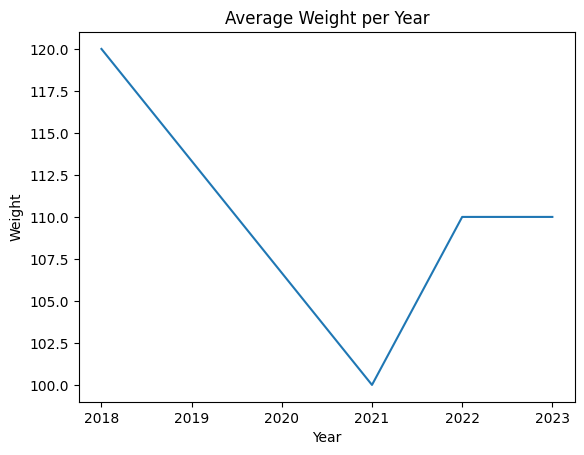

In [82]:
yearWeight = body_mass.groupby(['startYear']).agg({'value': 'mean'}).reset_index()
sns.lineplot(data=yearWeight, x = 'startYear', y = 'value', markers=True);
plt.title('Average Weight per Year');
plt.xlabel('Year');
plt.ylabel('Weight');
plt.show();

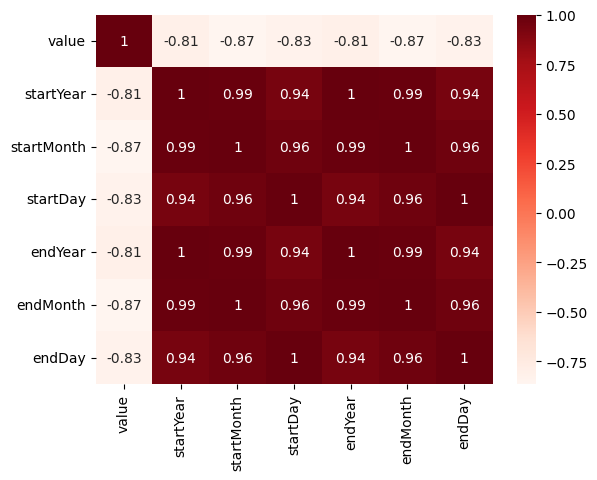

In [83]:
numeric_df = body_mass.select_dtypes(include=['number'])
matrix = numeric_df.corr()

sns.heatmap(matrix, cmap="Reds", annot=True);

In [84]:
body_mass.to_excel('body_mass.xlsx')

**heart rate**

In [85]:
heart_rate.dtypes

,0
type,object
sourceName,object
unit,object
startDate,datetime64[ns]
endDate,datetime64[ns]
value,object
startYear,int32
startMonth,int32
startDay,int32
endYear,int32


In [86]:
heart_rate['value'] = heart_rate['value'].astype(float)

<ipython-input-86-0be6c7441339>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_rate['value'] = heart_rate['value'].astype(float)


In [87]:
heart_rate

,type,sourceName,unit,startDate,endDate,value,startYear,startMonth,startDay,endYear,endMonth,endDay
13,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2023-09-17 10:42:00,2023-09-17 10:42:00,71.0000,2023,9,17,2023,9,17
14,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2023-09-17 10:45:47,2023-09-17 10:45:47,104.0000,2023,9,17,2023,9,17
15,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2023-09-17 10:47:40,2023-09-17 10:47:40,63.4445,2023,9,17,2023,9,17
16,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2023-09-17 10:47:48,2023-09-17 10:47:48,55.0000,2023,9,17,2023,9,17
17,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2023-09-17 10:56:18,2023-09-17 10:56:18,106.0000,2023,9,17,2023,9,17
...,...,...,...,...,...,...,...,...,...,...,...,...
102019,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2025-02-26 18:21:35,2025-02-26 18:21:35,80.0000,2025,2,26,2025,2,26
102020,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2025-02-26 18:26:21,2025-02-26 18:26:21,80.0000,2025,2,26,2025,2,26
102021,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2025-02-26 18:31:44,2025-02-26 18:31:44,77.0000,2025,2,26,2025,2,26
102022,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2025-02-26 18:34:00,2025-02-26 18:34:00,79.0000,2025,2,26,2025,2,26


In [88]:
for i in range(len(heart_rate['startDate'])):
  heart_rate['startHour'] = heart_rate['startDate'].dt.hour
heart_rate

<ipython-input-88-87a0fd9f7134>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_rate['startHour'] = heart_rate['startDate'].dt.hour


,type,sourceName,unit,startDate,endDate,value,startYear,startMonth,startDay,endYear,endMonth,endDay,startHour
13,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2023-09-17 10:42:00,2023-09-17 10:42:00,71.0000,2023,9,17,2023,9,17,10
14,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2023-09-17 10:45:47,2023-09-17 10:45:47,104.0000,2023,9,17,2023,9,17,10
15,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2023-09-17 10:47:40,2023-09-17 10:47:40,63.4445,2023,9,17,2023,9,17,10
16,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2023-09-17 10:47:48,2023-09-17 10:47:48,55.0000,2023,9,17,2023,9,17,10
17,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2023-09-17 10:56:18,2023-09-17 10:56:18,106.0000,2023,9,17,2023,9,17,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102019,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2025-02-26 18:21:35,2025-02-26 18:21:35,80.0000,2025,2,26,2025,2,26,18
102020,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2025-02-26 18:26:21,2025-02-26 18:26:21,80.0000,2025,2,26,2025,2,26,18
102021,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2025-02-26 18:31:44,2025-02-26 18:31:44,77.0000,2025,2,26,2025,2,26,18
102022,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2025-02-26 18:34:00,2025-02-26 18:34:00,79.0000,2025,2,26,2025,2,26,18


<ipython-input-89-6144903b49b5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=heart_rate, x = 'startHour', y = 'value', palette='viridis');


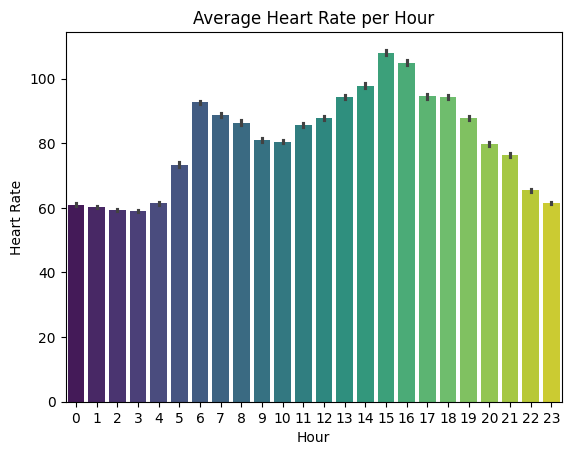

In [89]:
sns.barplot(data=heart_rate, x = 'startHour', y = 'value', palette='viridis');
plt.title('Average Heart Rate per Hour');
plt.xlabel('Hour');
plt.ylabel('Heart Rate');
plt.show();

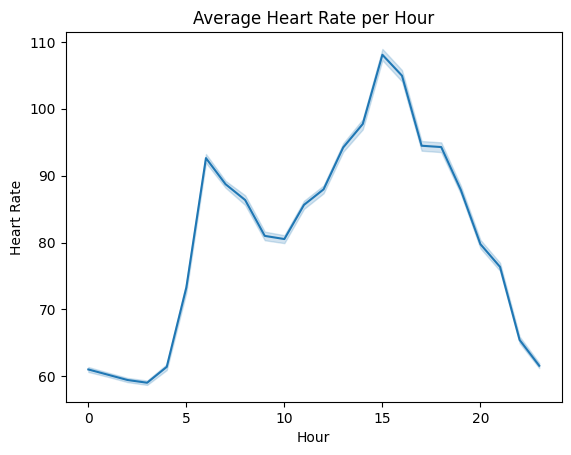

In [90]:
sns.lineplot(data=heart_rate, x = 'startHour', y = 'value', markers=True);
plt.title('Average Heart Rate per Hour');
plt.xlabel('Hour');
plt.ylabel('Heart Rate');
plt.show();

In [91]:
heart_rate_per_day = heart_rate.groupby(['startYear', 'startMonth', 'startDay']).agg({'type': 'first', 'sourceName': 'first', 'unit': 'first', 'startDate':'first', 'endYear':'first', 'endMonth': 'first', 'endDay': 'first','value': 'mean'}).reset_index()
heart_rate_per_day

,startYear,startMonth,startDay,type,sourceName,unit,startDate,endYear,endMonth,endDay,value
0,2023,9,17,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2023-09-17 10:42:00,2023,9,17,91.371169
1,2023,9,18,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2023-09-18 00:11:18,2023,9,18,70.829574
2,2023,9,19,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2023-09-19 00:00:11,2023,9,19,89.008631
3,2023,9,20,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2023-09-20 00:01:56,2023,9,20,70.384012
4,2023,9,21,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2023-09-21 00:02:40,2023,9,21,91.681906
...,...,...,...,...,...,...,...,...,...,...,...
399,2025,2,22,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2025-02-22 00:01:46,2025,2,22,73.842552
400,2025,2,23,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2025-02-23 00:02:18,2025,2,23,67.959551
401,2025,2,24,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2025-02-24 05:57:42,2025,2,24,83.501560
402,2025,2,25,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2025-02-25 00:04:28,2025,2,25,75.550364


In [92]:
largestHeartRates = heart_rate_per_day.sort_values(by='value', ascending=False).head(10)
largestHeartRates

,startYear,startMonth,startDay,type,sourceName,unit,startDate,endYear,endMonth,endDay,value
207,2024,5,2,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2024-05-02 18:18:21,2024,5,2,153.992286
208,2024,5,4,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2024-05-04 17:55:42,2024,5,4,142.059673
203,2024,4,25,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2024-04-25 15:03:43,2024,4,25,134.855000
276,2024,7,18,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2024-07-18 06:30:38,2024,7,18,133.983667
382,2025,2,3,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2025-02-03 00:02:38,2025,2,3,130.573081
256,2024,6,27,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2024-06-27 18:20:43,2024,6,27,129.129033
379,2025,1,31,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2025-01-31 00:12:08,2025,1,31,127.461141
299,2024,8,11,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2024-08-11 08:53:13,2024,8,11,127.054489
386,2025,2,7,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2025-02-07 06:34:26,2025,2,7,124.355372
192,2024,4,14,HKQuantityTypeIdentifierHeartRate,Jannah’s Apple Watch,count/min,2024-04-14 08:34:39,2024,4,14,124.261212


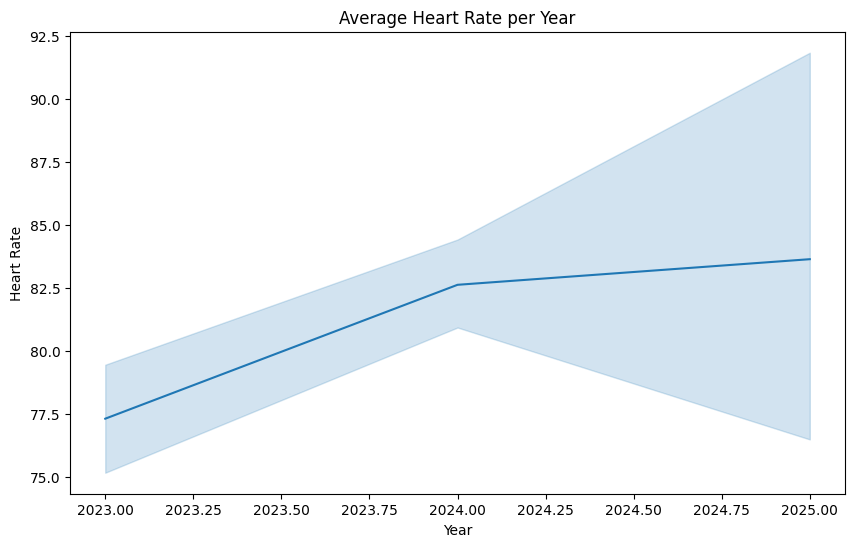

In [93]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=heart_rate_per_day, x = 'startYear', y = 'value', markers=True);
plt.title('Average Heart Rate per Year');
plt.xlabel('Year');
plt.ylabel('Heart Rate');
plt.show();

<ipython-input-94-b3de20d7f693>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=largestHeartRates, x='date', y='value', palette='viridis');


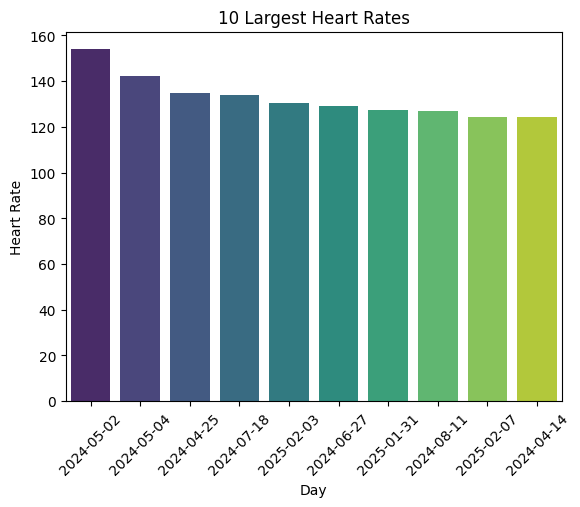

In [94]:
# Convert the three date columns to a single datetime column
largestHeartRates['date'] = pd.to_datetime(largestHeartRates[['startYear', 'startMonth', 'startDay']].rename(columns={'startYear': 'year', 'startMonth': 'month', 'startDay': 'day'}))

# Now use the 'date' column for the x-axis
sns.barplot(data=largestHeartRates, x='date', y='value', palette='viridis');
plt.title('10 Largest Heart Rates');
plt.xlabel('Day');
plt.xticks(rotation=45);
plt.ylabel('Heart Rate');
plt.show();

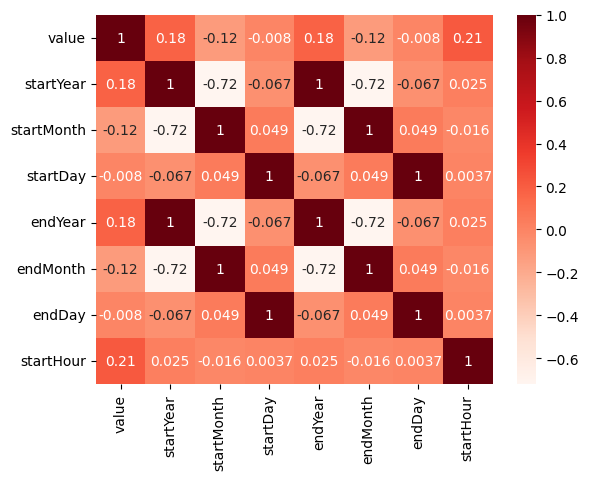

In [95]:
numeric_df = heart_rate.select_dtypes(include=['number'])
matrix = numeric_df.corr()

sns.heatmap(matrix, cmap="Reds", annot=True)
plt.show();

In [96]:
heart_rate.to_excel('heart_rate.xlsx')

In [97]:
heart_rate_per_day.to_excel('heart_rate_per_day.xlsx')

**respritory rate**

In [98]:
respritory_rate['value'] = respritory_rate['value'].astype(float)

<ipython-input-98-194bb54b3a8d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respritory_rate['value'] = respritory_rate['value'].astype(float)


In [99]:
for i in range(len(respritory_rate['startDate'])):
  respritory_rate['startHour'] = respritory_rate['startDate'].dt.hour
respritory_rate

<ipython-input-99-f35442eebf8d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respritory_rate['startHour'] = respritory_rate['startDate'].dt.hour


,type,sourceName,unit,startDate,endDate,value,startYear,startMonth,startDay,endYear,endMonth,endDay,startHour
102024,HKQuantityTypeIdentifierRespiratoryRate,Jannah’s Apple Watch,count/min,2025-01-26 23:20:52,2025-01-26 23:20:52,24.0,2025,1,26,2025,1,26,23
102025,HKQuantityTypeIdentifierRespiratoryRate,Jannah’s Apple Watch,count/min,2025-01-26 23:32:22,2025-01-26 23:32:22,23.0,2025,1,26,2025,1,26,23
102026,HKQuantityTypeIdentifierRespiratoryRate,Jannah’s Apple Watch,count/min,2025-01-26 23:37:22,2025-01-26 23:37:22,23.0,2025,1,26,2025,1,26,23
102027,HKQuantityTypeIdentifierRespiratoryRate,Jannah’s Apple Watch,count/min,2025-01-26 23:51:52,2025-01-26 23:51:52,14.0,2025,1,26,2025,1,26,23
102028,HKQuantityTypeIdentifierRespiratoryRate,Jannah’s Apple Watch,count/min,2025-01-27 00:02:22,2025-01-27 00:02:22,16.0,2025,1,27,2025,1,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102987,HKQuantityTypeIdentifierRespiratoryRate,Jannah’s Apple Watch,count/min,2025-02-23 05:28:08,2025-02-23 05:28:08,15.0,2025,2,23,2025,2,23,5
102988,HKQuantityTypeIdentifierRespiratoryRate,Jannah’s Apple Watch,count/min,2025-02-23 05:38:08,2025-02-23 05:38:08,15.0,2025,2,23,2025,2,23,5
102989,HKQuantityTypeIdentifierRespiratoryRate,Jannah’s Apple Watch,count/min,2025-02-23 05:52:09,2025-02-23 05:52:09,15.5,2025,2,23,2025,2,23,5
102990,HKQuantityTypeIdentifierRespiratoryRate,Jannah’s Apple Watch,count/min,2025-02-23 06:04:09,2025-02-23 06:04:09,16.0,2025,2,23,2025,2,23,6


<ipython-input-100-a0a0b3b8c6f3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=respritory_rate, x = 'startHour', y = 'value', palette='viridis');


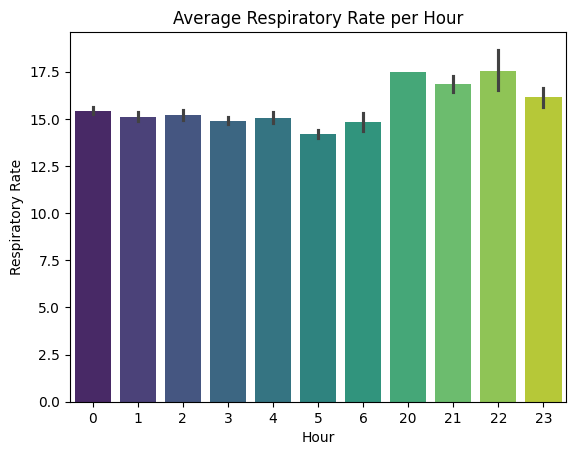

In [100]:
sns.barplot(data=respritory_rate, x = 'startHour', y = 'value', palette='viridis');
plt.title('Average Respiratory Rate per Hour');
plt.xlabel('Hour');
plt.ylabel('Respiratory Rate');
plt.show();

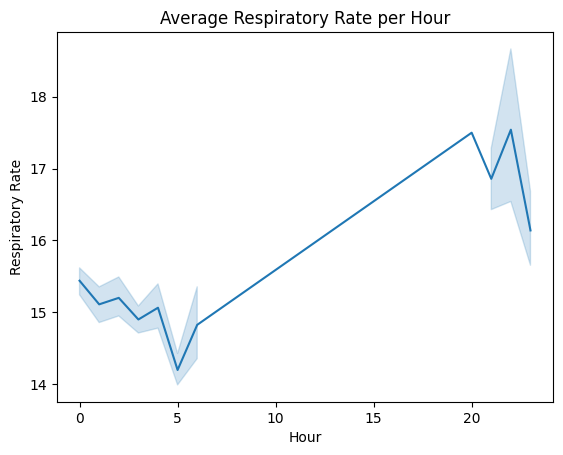

In [101]:
sns.lineplot(data=respritory_rate, x = 'startHour', y = 'value', markers=True);
plt.title('Average Respiratory Rate per Hour');
plt.xlabel('Hour');
plt.ylabel('Respiratory Rate');
plt.show()

In [131]:
respritory_rate_per_day = respritory_rate.groupby(['startYear', 'startMonth', 'startDay']).agg({'type': 'first', 'sourceName': 'first', 'unit': 'first', 'startDate':'first', 'endYear':'first', 'endMonth': 'first', 'endDay': 'first','value': 'mean'}).reset_index()
largest_respritory_rate_per_day = respritory_rate_per_day.sort_values(by='value', ascending= False).head(10)
largest_respritory_rate_per_day

,startYear,startMonth,startDay,type,sourceName,unit,startDate,endYear,endMonth,endDay,value
0,2025,1,26,HKQuantityTypeIdentifierRespiratoryRate,Jannah’s Apple Watch,count/min,2025-01-26 23:20:52,2025,1,26,21.000000
6,2025,2,1,HKQuantityTypeIdentifierRespiratoryRate,Jannah’s Apple Watch,count/min,2025-02-01 00:18:57,2025,2,1,16.416667
12,2025,2,7,HKQuantityTypeIdentifierRespiratoryRate,Jannah’s Apple Watch,count/min,2025-02-07 22:53:58,2025,2,7,16.285714
10,2025,2,5,HKQuantityTypeIdentifierRespiratoryRate,Jannah’s Apple Watch,count/min,2025-02-05 20:58:36,2025,2,5,16.076923
9,2025,2,4,HKQuantityTypeIdentifierRespiratoryRate,Jannah’s Apple Watch,count/min,2025-02-04 00:07:56,2025,2,4,16.000000
13,2025,2,8,HKQuantityTypeIdentifierRespiratoryRate,Jannah’s Apple Watch,count/min,2025-02-08 00:04:57,2025,2,8,15.931818
3,2025,1,29,HKQuantityTypeIdentifierRespiratoryRate,Jannah’s Apple Watch,count/min,2025-01-29 00:11:20,2025,1,29,15.844828
7,2025,2,2,HKQuantityTypeIdentifierRespiratoryRate,Jannah’s Apple Watch,count/min,2025-02-02 00:11:54,2025,2,2,15.653846
5,2025,1,31,HKQuantityTypeIdentifierRespiratoryRate,Jannah’s Apple Watch,count/min,2025-01-31 00:13:52,2025,1,31,15.636364
1,2025,1,27,HKQuantityTypeIdentifierRespiratoryRate,Jannah’s Apple Watch,count/min,2025-01-27 00:02:22,2025,1,27,15.527778


<ipython-input-135-027c8f01a254>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=largest_respritory_rate_per_day, x = 'date', y = 'value', palette='viridis');


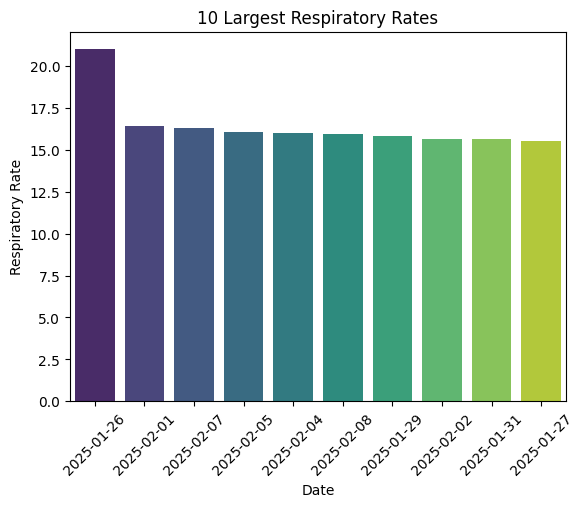

In [135]:
# Convert the three date columns to a single datetime column
largest_respritory_rate_per_day['date'] = pd.to_datetime(largest_respritory_rate_per_day[['startYear', 'startMonth', 'startDay']].rename(columns={'startYear': 'year', 'startMonth': 'month', 'startDay': 'day'}))
sns.barplot(data=largest_respritory_rate_per_day, x = 'date', y = 'value', palette='viridis');
plt.title('10 Largest Respiratory Rates');
plt.xlabel('Date');
plt.xticks(rotation=45);
plt.ylabel('Respiratory Rate');
plt.show();

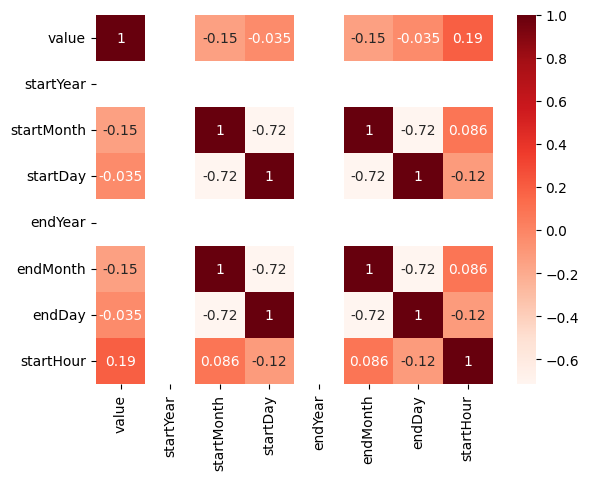

In [149]:
numeric_df = respritory_rate.select_dtypes(include=['number'])
matrix = numeric_df.corr()

sns.heatmap(matrix, cmap="Reds", annot=True)
plt.show();

In [136]:
respritory_rate.to_excel('respritory_rate.xlsx')
respritory_rate_per_day.to_excel('respritory_rate_per_day.xlsx')

**step count**

In [102]:
step_count['value'] = step_count['value'].astype(float)

<ipython-input-102-fc09b08301c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  step_count['value'] = step_count['value'].astype(float)


In [138]:
for i in range(len(step_count['startDate'])):
  step_count['startHour'] = step_count['startDate'].dt.hour
step_count

<ipython-input-138-e63b731cf50b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  step_count['startHour'] = step_count['startDate'].dt.hour


,type,sourceName,unit,startDate,endDate,value,startYear,startMonth,startDay,endYear,endMonth,endDay,startHour
102992,HKQuantityTypeIdentifierStepCount,iPhone,count,2018-02-20 21:06:51,2018-02-20 21:16:15,55.0,2018,2,20,2018,2,20,21
102993,HKQuantityTypeIdentifierStepCount,iPhone,count,2018-02-21 07:35:04,2018-02-21 07:38:28,8.0,2018,2,21,2018,2,21,7
102994,HKQuantityTypeIdentifierStepCount,iPhone,count,2018-02-21 14:44:13,2018-02-21 14:53:54,24.0,2018,2,21,2018,2,21,14
102995,HKQuantityTypeIdentifierStepCount,iPhone,count,2018-02-21 14:53:54,2018-02-21 15:03:35,266.0,2018,2,21,2018,2,21,14
102996,HKQuantityTypeIdentifierStepCount,iPhone,count,2018-02-21 15:03:35,2018-02-21 15:13:25,44.0,2018,2,21,2018,2,21,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
194930,HKQuantityTypeIdentifierStepCount,Jannah’s Apple Watch,count,2025-02-26 18:59:31,2025-02-26 18:59:38,3.0,2025,2,26,2025,2,26,18
194931,HKQuantityTypeIdentifierStepCount,Jannah’s Apple Watch,count,2025-02-26 19:00:01,2025-02-26 19:00:53,16.0,2025,2,26,2025,2,26,19
194932,HKQuantityTypeIdentifierStepCount,Jannah’s Apple Watch,count,2025-02-26 19:01:34,2025-02-26 19:01:36,4.0,2025,2,26,2025,2,26,19
194933,HKQuantityTypeIdentifierStepCount,Jannah’s Apple Watch,count,2025-02-26 19:02:50,2025-02-26 19:02:55,22.0,2025,2,26,2025,2,26,19


<ipython-input-140-d8e346b0b718>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=step_count, x = 'startHour', y = 'value', hue = None, palette='viridis');


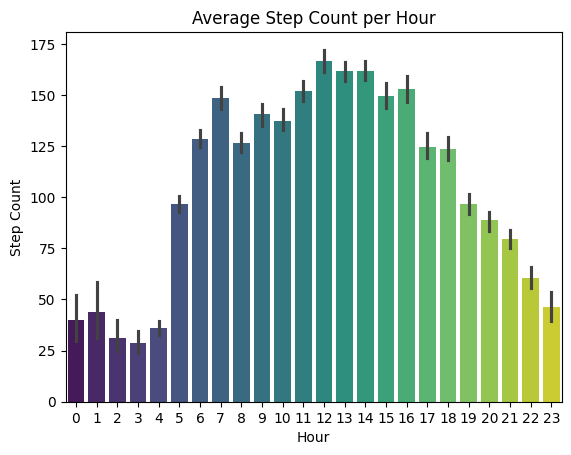

In [140]:
sns.barplot(data=step_count, x = 'startHour', y = 'value', hue = None, palette='viridis');
plt.title('Average Step Count per Hour');
plt.xlabel('Hour');
plt.ylabel('Step Count');
plt.show();

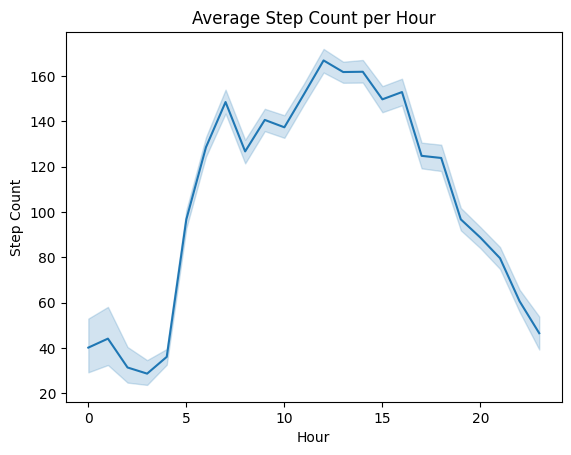

In [141]:
sns.lineplot(data=step_count, x = 'startHour', y = 'value', markers=True);
plt.title('Average Step Count per Hour');
plt.xlabel('Hour');
plt.ylabel('Step Count');
plt.show();

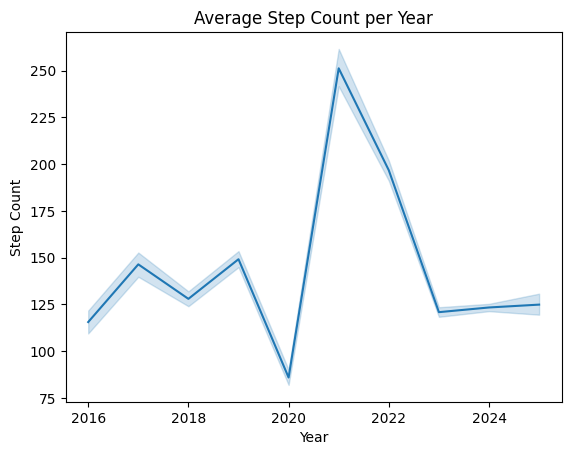

In [142]:
sns.lineplot(data=step_count, x = 'startYear', y = 'value', markers=True);
plt.title('Average Step Count per Year');
plt.xlabel('Year');
plt.ylabel('Step Count');
plt.show();

<ipython-input-143-e112716c1bf0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=step_count, x = 'startYear', y = 'value', palette='viridis');


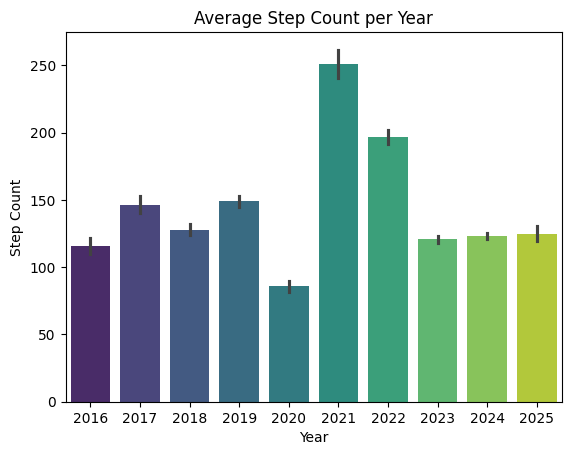

In [143]:
sns.barplot(data=step_count, x = 'startYear', y = 'value', palette='viridis');
plt.title('Average Step Count per Year');
plt.xlabel('Year');
plt.ylabel('Step Count');
plt.show();

In [151]:
totalSteps = step_count.groupby(['startYear', 'startMonth', 'startDay']).agg({'type': 'first', 'sourceName': 'first', 'unit': 'first', 'startHour': 'first', 'startDate':'first', 'endYear':'first', 'endMonth': 'first', 'endDay': 'first','value': 'sum'}).reset_index()
totalSteps

,startYear,startMonth,startDay,type,sourceName,unit,startHour,startDate,endYear,endMonth,endDay,value
0,2016,4,30,HKQuantityTypeIdentifierStepCount,iPhone,count,15,2016-04-30 15:06:27,2016,4,30,139.0
1,2016,5,4,HKQuantityTypeIdentifierStepCount,iPhone,count,10,2016-05-04 10:05:11,2016,5,4,804.0
2,2016,5,5,HKQuantityTypeIdentifierStepCount,iPhone,count,4,2016-05-05 04:28:39,2016,5,5,1978.0
3,2016,5,6,HKQuantityTypeIdentifierStepCount,iPhone,count,4,2016-05-06 04:44:32,2016,5,6,571.0
4,2016,5,7,HKQuantityTypeIdentifierStepCount,iPhone,count,17,2016-05-07 17:59:50,2016,5,7,417.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3089,2025,2,22,HKQuantityTypeIdentifierStepCount,Jannah’s Apple Watch,count,0,2025-02-22 00:03:21,2025,2,22,10876.0
3090,2025,2,23,HKQuantityTypeIdentifierStepCount,Jannah’s Apple Watch,count,0,2025-02-23 00:18:02,2025,2,23,12560.0
3091,2025,2,24,HKQuantityTypeIdentifierStepCount,Jannah’s Apple Watch,count,5,2025-02-24 05:56:15,2025,2,24,11674.0
3092,2025,2,25,HKQuantityTypeIdentifierStepCount,Jannah’s Apple Watch,count,0,2025-02-25 00:15:52,2025,2,25,8470.0


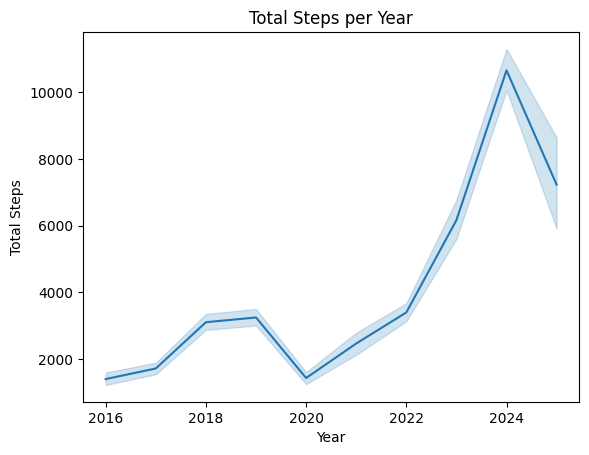

In [152]:
sns.lineplot(data=totalSteps, x = 'startYear', y = 'value', markers=True);
plt.title('Total Steps per Year');
plt.xlabel('Year');
plt.ylabel('Total Steps');
plt.show();

<ipython-input-153-d9cdf07ebabe>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=totalSteps, x = 'startYear', y = 'value', palette='viridis');


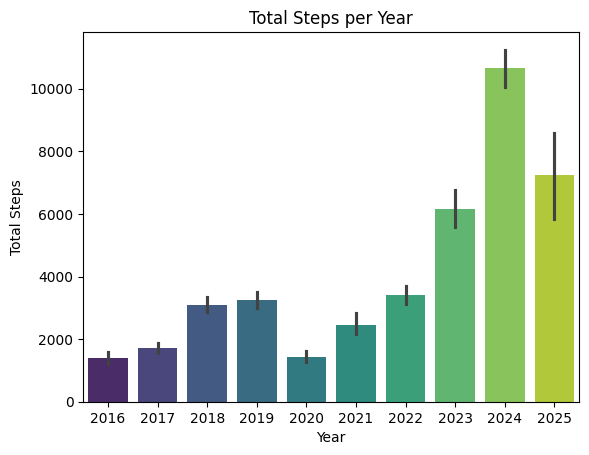

In [153]:
sns.barplot(data=totalSteps, x = 'startYear', y = 'value', palette='viridis');
plt.title('Total Steps per Year');
plt.xlabel('Year');
plt.ylabel('Total Steps');
plt.show();

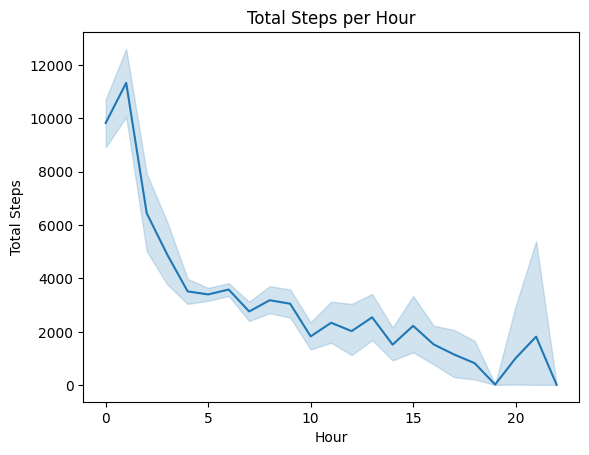

In [154]:
sns.lineplot(data=totalSteps, x = 'startHour', y = 'value', markers=True);
plt.title('Total Steps per Hour');
plt.xlabel('Hour');
plt.ylabel('Total Steps');
plt.show();

<ipython-input-155-e81777ab30dc>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=totalSteps, x = 'startHour', y = 'value', palette='viridis');


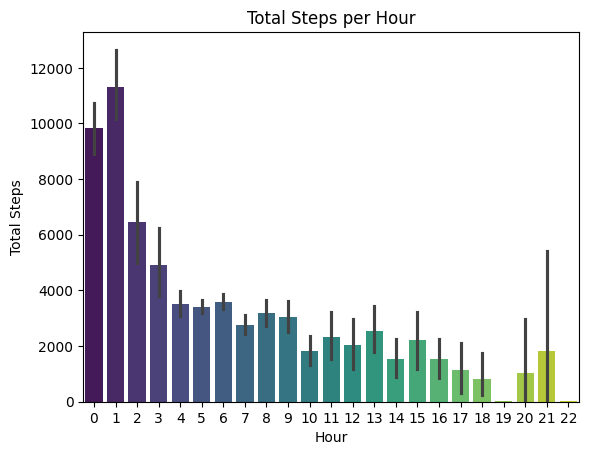

In [155]:
sns.barplot(data=totalSteps, x = 'startHour', y = 'value', palette='viridis');
plt.title('Total Steps per Hour');
plt.xlabel('Hour');
plt.ylabel('Total Steps');
plt.show();

<ipython-input-157-39468cc91493>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=largestSteps, x = 'date', y = 'value', palette='viridis');


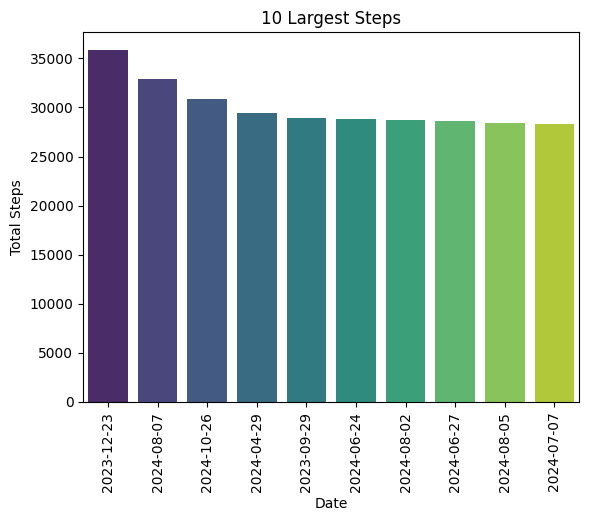

In [157]:
largestSteps = totalSteps.sort_values(by='value', ascending=False).head(10)

largestSteps['date'] = pd.to_datetime(largestSteps[['startYear', 'startMonth', 'startDay']].rename(columns={'startYear': 'year', 'startMonth': 'month', 'startDay': 'day'}))
sns.barplot(data=largestSteps, x = 'date', y = 'value', palette='viridis');
plt.title('10 Largest Steps');
plt.xlabel('Date');
plt.xticks(rotation=90);
plt.ylabel('Total Steps');
plt.show();

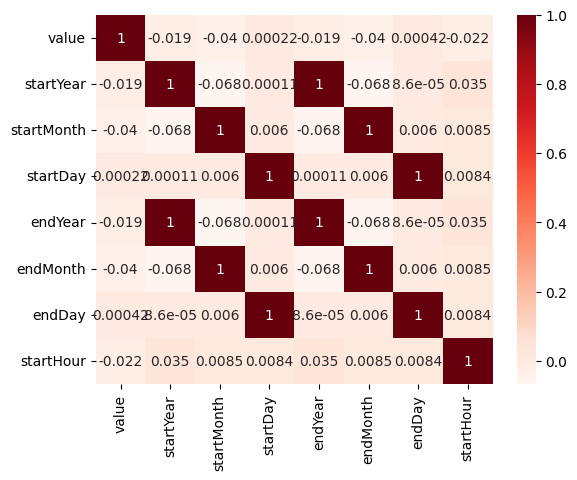

<Figure size 1000x1000 with 0 Axes>

In [178]:
numeric_df = step_count.select_dtypes(include=['number'])
matrix = numeric_df.corr()

sns.heatmap(matrix, cmap="Reds", annot=True);
plt.figure(figsize=(10, 10));
plt.show();

In [158]:
step_count.to_excel('step_count.xlsx')
totalSteps.to_excel('totalSteps.xlsx')

**distance walking running**

In [103]:
runWalk['value'] = runWalk['value'].astype(float)

<ipython-input-103-b0291308fd38>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runWalk['value'] = runWalk['value'].astype(float)


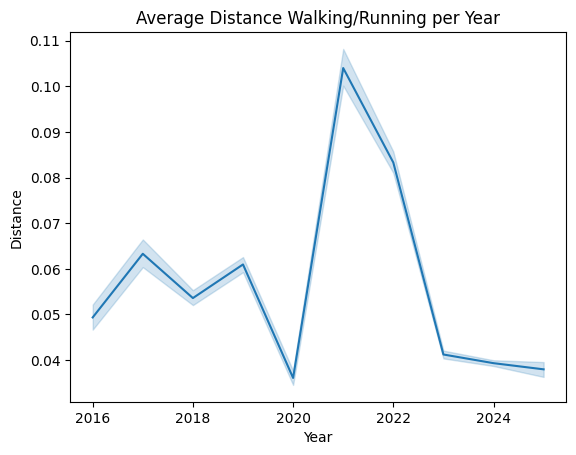

In [160]:
sns.lineplot(data=runWalk, x = 'startYear', y = 'value', markers=True);
plt.title('Average Distance Walking/Running per Year');
plt.xlabel('Year');
plt.ylabel('Distance');
plt.show();

<ipython-input-161-1d03970ff9c6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=runWalk, x = 'startYear', y = 'value', palette='viridis');


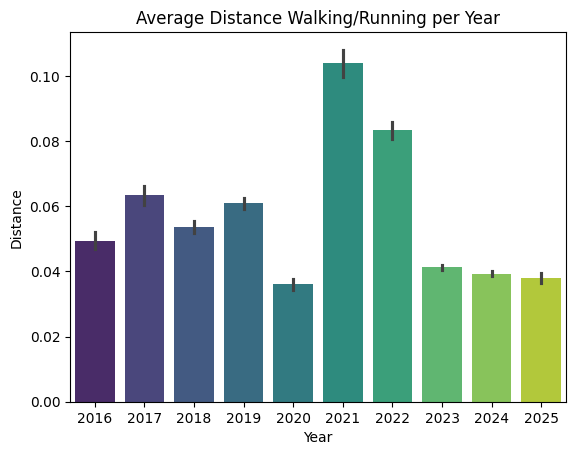

In [161]:
sns.barplot(data=runWalk, x = 'startYear', y = 'value', palette='viridis');
plt.title('Average Distance Walking/Running per Year');
plt.xlabel('Year');
plt.ylabel('Distance');
plt.show();

<ipython-input-164-6cfdaddfad84>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runWalk['startHour'] = runWalk['startDate'].dt.hour


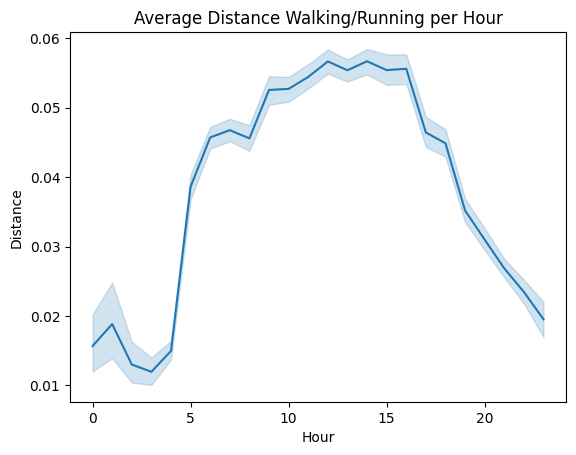

In [164]:
runWalk['startHour'] = runWalk['startDate'].dt.hour
sns.lineplot(data=runWalk, x = 'startHour', y = 'value', markers=True);
plt.title('Average Distance Walking/Running per Hour');
plt.xlabel('Hour');
plt.ylabel('Distance');
plt.show();

<ipython-input-165-faedb05005a0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=runWalk, x = 'startHour', y = 'value', palette='viridis');


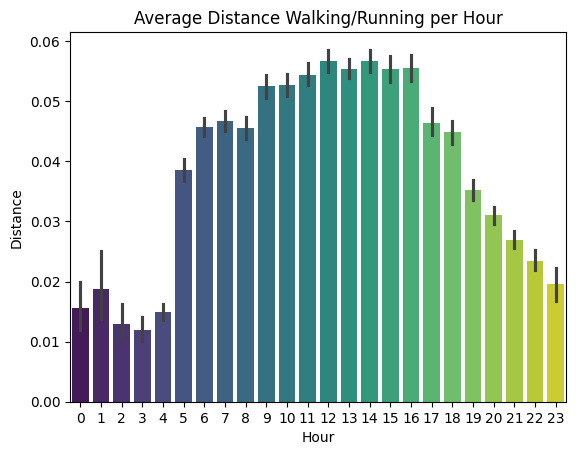

In [165]:
sns.barplot(data=runWalk, x = 'startHour', y = 'value', palette='viridis');
plt.title('Average Distance Walking/Running per Hour');
plt.xlabel('Hour');
plt.ylabel('Distance');
plt.show();

In [166]:
runWalk_per_day = runWalk.groupby(['startYear', 'startMonth', 'startDay']).agg({'type': 'first', 'startHour': 'first', 'sourceName': 'first', 'unit': 'first', 'startDate':'first', 'endYear':'first', 'endMonth': 'first', 'endDay': 'first','value': 'sum'}).reset_index()
runWalk_per_day

,startYear,startMonth,startDay,type,startHour,sourceName,unit,startDate,endYear,endMonth,endDay,value
0,2016,4,30,HKQuantityTypeIdentifierDistanceWalkingRunning,15,iPhone,mi,2016-04-30 15:06:27,2016,4,30,0.063150
1,2016,5,4,HKQuantityTypeIdentifierDistanceWalkingRunning,10,iPhone,mi,2016-05-04 10:05:11,2016,5,4,0.405867
2,2016,5,5,HKQuantityTypeIdentifierDistanceWalkingRunning,4,iPhone,mi,2016-05-05 04:22:39,2016,5,5,0.962131
3,2016,5,6,HKQuantityTypeIdentifierDistanceWalkingRunning,4,iPhone,mi,2016-05-06 04:38:32,2016,5,6,0.283979
4,2016,5,7,HKQuantityTypeIdentifierDistanceWalkingRunning,17,iPhone,mi,2016-05-07 17:59:50,2016,5,7,0.182515
...,...,...,...,...,...,...,...,...,...,...,...,...
3089,2025,2,22,HKQuantityTypeIdentifierDistanceWalkingRunning,0,Jannah’s Apple Watch,mi,2025-02-22 00:03:21,2025,2,22,4.501958
3090,2025,2,23,HKQuantityTypeIdentifierDistanceWalkingRunning,0,Jannah’s Apple Watch,mi,2025-02-23 00:18:02,2025,2,23,5.044715
3091,2025,2,24,HKQuantityTypeIdentifierDistanceWalkingRunning,5,Jannah’s Apple Watch,mi,2025-02-24 05:56:15,2025,2,24,4.774577
3092,2025,2,25,HKQuantityTypeIdentifierDistanceWalkingRunning,0,Jannah’s Apple Watch,mi,2025-02-25 00:15:52,2025,2,25,3.404984


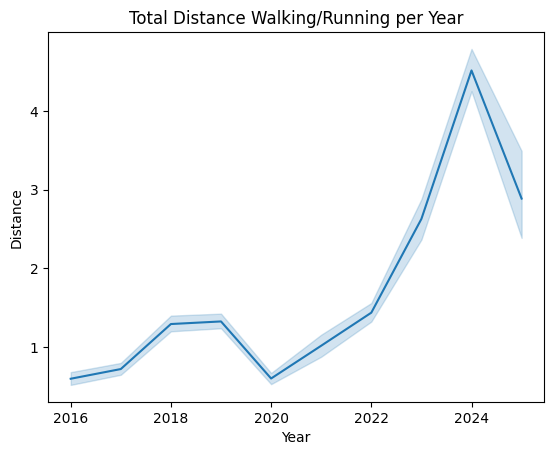

In [167]:
sns.lineplot(data=runWalk_per_day, x = 'startYear', y = 'value', markers=True);
plt.title('Total Distance Walking/Running per Year');
plt.xlabel('Year');
plt.ylabel('Distance');
plt.show();

<ipython-input-170-ac88ad4f9fa1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=runWalk_per_day, x = 'startYear', y = 'value', palette='viridis');


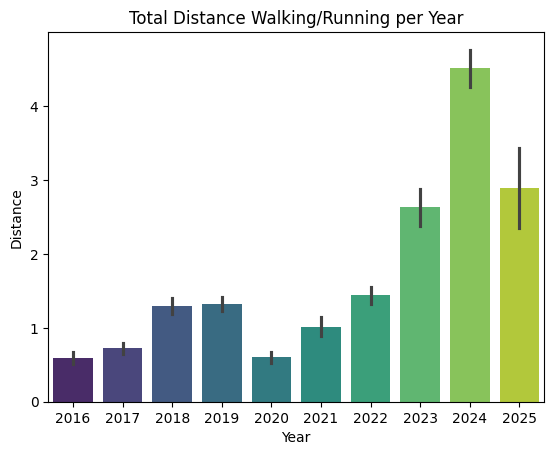

In [170]:
sns.barplot(data=runWalk_per_day, x = 'startYear', y = 'value', palette='viridis');
plt.title('Total Distance Walking/Running per Year');
plt.xlabel('Year');
plt.ylabel('Distance');
plt.show();

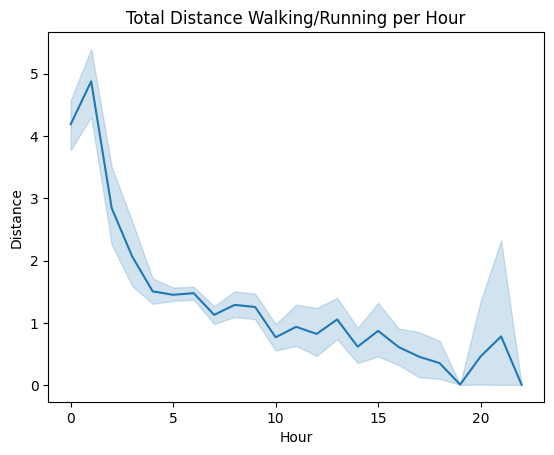

In [171]:
sns.lineplot(data=runWalk_per_day, x = 'startHour', y = 'value', markers=True);
plt.title('Total Distance Walking/Running per Hour');
plt.xlabel('Hour');
plt.ylabel('Distance');
plt.show();

<ipython-input-172-2fede15b9125>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=runWalk_per_day, x = 'startHour', y = 'value', palette='viridis');


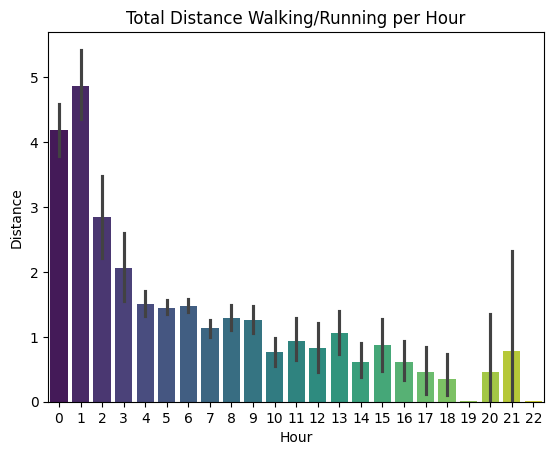

In [172]:
sns.barplot(data=runWalk_per_day, x = 'startHour', y = 'value', palette='viridis');
plt.title('Total Distance Walking/Running per Hour');
plt.xlabel('Hour');
plt.ylabel('Distance');
plt.show();

<ipython-input-176-a6c2a497c8c8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=largestRunWalks, x = 'date', y = 'value', palette='viridis');


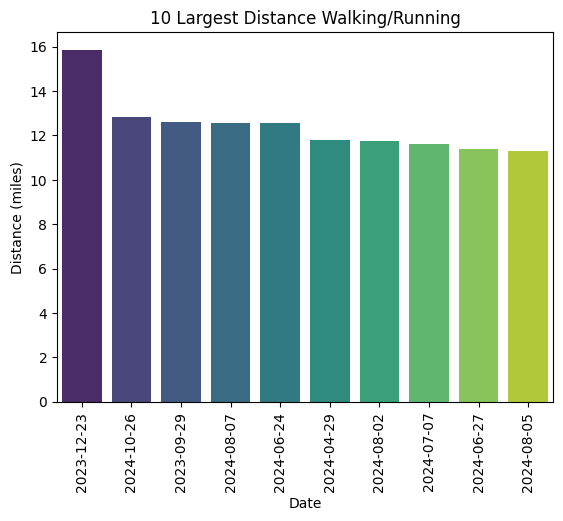

In [176]:
largestRunWalks = runWalk_per_day.sort_values(by='value', ascending=False).head(10)
largestRunWalks['date'] = pd.to_datetime(largestRunWalks[['startYear', 'startMonth', 'startDay']].rename(columns={'startYear': 'year', 'startMonth': 'month', 'startDay': 'day'}))
sns.barplot(data=largestRunWalks, x = 'date', y = 'value', palette='viridis');
plt.title('10 Largest Distance Walking/Running');
plt.xlabel('Date');
plt.xticks(rotation=90);
plt.ylabel('Distance (miles)');
plt.show();

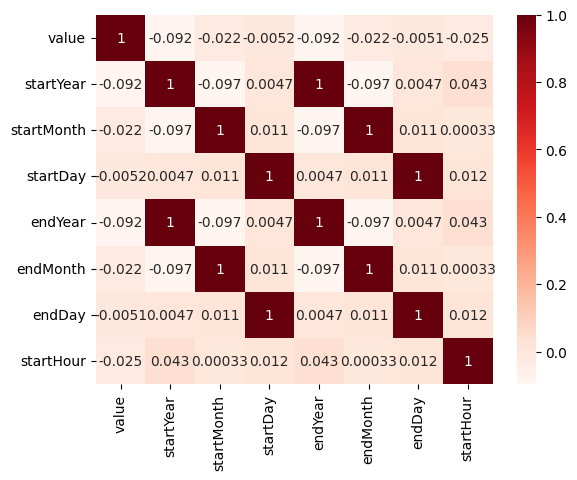

In [179]:
numeric_df = runWalk.select_dtypes(include=['number'])
matrix = numeric_df.corr()

sns.heatmap(matrix, cmap="Reds", annot=True)
plt.show();

In [173]:
runWalk.to_excel('runWalk.xlsx')
runWalk_per_day.to_excel('runWalk_per_day.xlsx')

**basal energy**

In [104]:
basalEnergy['value'] = basalEnergy['value'].astype(float)

<ipython-input-104-cbe635363f50>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basalEnergy['value'] = basalEnergy['value'].astype(float)


**active energy**

In [105]:
activeEnergy['value'] = activeEnergy['value'].astype(float)

<ipython-input-105-2bcadfa72c93>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activeEnergy['value'] = activeEnergy['value'].astype(float)


**flights energy**

In [106]:
flightsClimbed['value'] = flightsClimbed['value'].astype(float)

<ipython-input-106-040073426ffd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flightsClimbed['value'] = flightsClimbed['value'].astype(float)


**exercise time**

In [107]:
exerciseTime['value'] = exerciseTime['value'].astype(float)

<ipython-input-107-a2fb9af0da1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exerciseTime['value'] = exerciseTime['value'].astype(float)


**distance cycling**

In [108]:
distanceCycling['value'] = distanceCycling['value'].astype(float)

<ipython-input-108-dc0780e7050b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distanceCycling['value'] = distanceCycling['value'].astype(float)


**distance swimming**

In [109]:
distanceSwimming['value'] = distanceSwimming['value'].astype(float)

<ipython-input-109-9d7c3cb45916>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distanceSwimming['value'] = distanceSwimming['value'].astype(float)


**stroke count**

In [110]:
swimStroke['value'] = swimStroke['value'].astype(float)

<ipython-input-110-32b597d1d914>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swimStroke['value'] = swimStroke['value'].astype(float)


**resting heart rate**

In [111]:
restingHeartRate['value'] = restingHeartRate['value'].astype(float)

<ipython-input-111-6c8062249dd2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restingHeartRate['value'] = restingHeartRate['value'].astype(float)


**vo2**

In [112]:
vo2['value'] = vo2['value'].astype(float)

<ipython-input-112-b604b8d6510c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vo2['value'] = vo2['value'].astype(float)


**walking heart rate**

In [113]:
walkHeartRate_avg['value'] = walkHeartRate_avg['value'].astype(float)

<ipython-input-113-a7bbf049e3c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  walkHeartRate_avg['value'] = walkHeartRate_avg['value'].astype(float)


**headphone audio exposure**

In [114]:
headphoneAudio_exposure['value'] = headphoneAudio_exposure['value'].astype(float)

<ipython-input-114-691fc5e526ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  headphoneAudio_exposure['value'] = headphoneAudio_exposure['value'].astype(float)


**walking double support**

In [115]:
walking_double_support['value'] = walking_double_support['value'].astype(float)

<ipython-input-115-766f1118697d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  walking_double_support['value'] = walking_double_support['value'].astype(float)


**Apple Stand Hour**

In [116]:
standTime

,type,sourceName,unit,startDate,endDate,value,startYear,startMonth,startDay,endYear,endMonth,endDay
901015,HKCategoryTypeIdentifierAppleStandHour,Jannah’s Apple Watch,boolean,2023-09-17 10:00:00,2023-09-17 11:00:00,HKCategoryValueAppleStandHourStood,2023,9,17,2023,9,17
901016,HKCategoryTypeIdentifierAppleStandHour,Jannah’s Apple Watch,boolean,2023-09-17 11:00:00,2023-09-17 12:00:00,HKCategoryValueAppleStandHourStood,2023,9,17,2023,9,17
901017,HKCategoryTypeIdentifierAppleStandHour,Jannah’s Apple Watch,boolean,2023-09-17 12:00:00,2023-09-17 13:00:00,HKCategoryValueAppleStandHourStood,2023,9,17,2023,9,17
901018,HKCategoryTypeIdentifierAppleStandHour,Jannah’s Apple Watch,boolean,2023-09-17 13:00:00,2023-09-17 14:00:00,HKCategoryValueAppleStandHourIdle,2023,9,17,2023,9,17
901019,HKCategoryTypeIdentifierAppleStandHour,Jannah’s Apple Watch,boolean,2023-09-17 14:00:00,2023-09-17 15:00:00,HKCategoryValueAppleStandHourIdle,2023,9,17,2023,9,17
...,...,...,...,...,...,...,...,...,...,...,...,...
909313,HKCategoryTypeIdentifierAppleStandHour,Jannah’s Apple Watch,boolean,2025-02-26 14:00:00,2025-02-26 15:00:00,HKCategoryValueAppleStandHourStood,2025,2,26,2025,2,26
909314,HKCategoryTypeIdentifierAppleStandHour,Jannah’s Apple Watch,boolean,2025-02-26 15:00:00,2025-02-26 16:00:00,HKCategoryValueAppleStandHourStood,2025,2,26,2025,2,26
909315,HKCategoryTypeIdentifierAppleStandHour,Jannah’s Apple Watch,boolean,2025-02-26 16:00:00,2025-02-26 17:00:00,HKCategoryValueAppleStandHourStood,2025,2,26,2025,2,26
909316,HKCategoryTypeIdentifierAppleStandHour,Jannah’s Apple Watch,boolean,2025-02-26 17:00:00,2025-02-26 18:00:00,HKCategoryValueAppleStandHourStood,2025,2,26,2025,2,26


In [117]:
standTime['value'].unique()

array(['HKCategoryValueAppleStandHourStood',
       'HKCategoryValueAppleStandHourIdle'], dtype=object)

In [118]:
standTime['stoodUp'] = standTime['value'].apply(lambda x: 1 if x == 'HKCategoryValueAppleStandHourStood' else 0)
standTime

<ipython-input-118-22fd49f58a94>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  standTime['stoodUp'] = standTime['value'].apply(lambda x: 1 if x == 'HKCategoryValueAppleStandHourStood' else 0)


,type,sourceName,unit,startDate,endDate,value,startYear,startMonth,startDay,endYear,endMonth,endDay,stoodUp
901015,HKCategoryTypeIdentifierAppleStandHour,Jannah’s Apple Watch,boolean,2023-09-17 10:00:00,2023-09-17 11:00:00,HKCategoryValueAppleStandHourStood,2023,9,17,2023,9,17,1
901016,HKCategoryTypeIdentifierAppleStandHour,Jannah’s Apple Watch,boolean,2023-09-17 11:00:00,2023-09-17 12:00:00,HKCategoryValueAppleStandHourStood,2023,9,17,2023,9,17,1
901017,HKCategoryTypeIdentifierAppleStandHour,Jannah’s Apple Watch,boolean,2023-09-17 12:00:00,2023-09-17 13:00:00,HKCategoryValueAppleStandHourStood,2023,9,17,2023,9,17,1
901018,HKCategoryTypeIdentifierAppleStandHour,Jannah’s Apple Watch,boolean,2023-09-17 13:00:00,2023-09-17 14:00:00,HKCategoryValueAppleStandHourIdle,2023,9,17,2023,9,17,0
901019,HKCategoryTypeIdentifierAppleStandHour,Jannah’s Apple Watch,boolean,2023-09-17 14:00:00,2023-09-17 15:00:00,HKCategoryValueAppleStandHourIdle,2023,9,17,2023,9,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
909313,HKCategoryTypeIdentifierAppleStandHour,Jannah’s Apple Watch,boolean,2025-02-26 14:00:00,2025-02-26 15:00:00,HKCategoryValueAppleStandHourStood,2025,2,26,2025,2,26,1
909314,HKCategoryTypeIdentifierAppleStandHour,Jannah’s Apple Watch,boolean,2025-02-26 15:00:00,2025-02-26 16:00:00,HKCategoryValueAppleStandHourStood,2025,2,26,2025,2,26,1
909315,HKCategoryTypeIdentifierAppleStandHour,Jannah’s Apple Watch,boolean,2025-02-26 16:00:00,2025-02-26 17:00:00,HKCategoryValueAppleStandHourStood,2025,2,26,2025,2,26,1
909316,HKCategoryTypeIdentifierAppleStandHour,Jannah’s Apple Watch,boolean,2025-02-26 17:00:00,2025-02-26 18:00:00,HKCategoryValueAppleStandHourStood,2025,2,26,2025,2,26,1


**menstural flow**

In [119]:
menstrual_flow

,type,sourceName,unit,startDate,endDate,value,startYear,startMonth,startDay,endYear,endMonth,endDay
909318,HKCategoryTypeIdentifierMenstrualFlow,Health,multiclass,2023-12-07 12:00:00,2023-12-07 12:00:00,HKCategoryValueVaginalBleedingUnspecified,2023,12,7,2023,12,7
909319,HKCategoryTypeIdentifierMenstrualFlow,Health,multiclass,2023-12-08 12:00:00,2023-12-08 12:00:00,HKCategoryValueVaginalBleedingUnspecified,2023,12,8,2023,12,8
909320,HKCategoryTypeIdentifierMenstrualFlow,Health,multiclass,2023-12-09 12:00:00,2023-12-09 12:00:00,HKCategoryValueVaginalBleedingUnspecified,2023,12,9,2023,12,9
909321,HKCategoryTypeIdentifierMenstrualFlow,Health,multiclass,2023-12-10 12:00:00,2023-12-10 12:00:00,HKCategoryValueVaginalBleedingUnspecified,2023,12,10,2023,12,10
909322,HKCategoryTypeIdentifierMenstrualFlow,Health,multiclass,2023-12-11 12:00:00,2023-12-11 12:00:00,HKCategoryValueVaginalBleedingUnspecified,2023,12,11,2023,12,11
...,...,...,...,...,...,...,...,...,...,...,...,...
909423,HKCategoryTypeIdentifierMenstrualFlow,Health,multiclass,2025-02-05 12:00:00,2025-02-05 12:00:00,HKCategoryValueVaginalBleedingUnspecified,2025,2,5,2025,2,5
909424,HKCategoryTypeIdentifierMenstrualFlow,Health,multiclass,2025-02-06 12:00:00,2025-02-06 12:00:00,HKCategoryValueVaginalBleedingUnspecified,2025,2,6,2025,2,6
909425,HKCategoryTypeIdentifierMenstrualFlow,Health,multiclass,2025-02-07 12:00:00,2025-02-07 12:00:00,HKCategoryValueVaginalBleedingUnspecified,2025,2,7,2025,2,7
909426,HKCategoryTypeIdentifierMenstrualFlow,Health,multiclass,2025-02-08 12:00:00,2025-02-08 12:00:00,HKCategoryValueVaginalBleedingUnspecified,2025,2,8,2025,2,8


In [120]:
menstrual_flow['value'].unique()

array(['HKCategoryValueVaginalBleedingUnspecified',
       'HKCategoryValueVaginalBleedingMedium',
       'HKCategoryValueVaginalBleedingHeavy',
       'HKCategoryValueVaginalBleedingLight',
       'HKCategoryValueVaginalBleedingNone'], dtype=object)

In [121]:
for index, value in menstrual_flow['value'].items():
  if value == 'HKCategoryValueVaginalBleedingUnspecified':
    menstrual_flow.loc[index, 'flow'] = 1
  elif value == 'HKCategoryValueVaginalBleedingMedium':
    menstrual_flow.loc[index, 'flow'] = 2
  elif value == 'HKCategoryValueVaginalBleedingHeavy':
    menstrual_flow.loc[index, 'flow'] = 3
  elif value == 'HKCategoryValueVaginalBleedingLight':
    menstrual_flow.loc[index, 'flow'] = 4
  else:
    menstrual_flow.loc[index, 'flow'] = 0
menstrual_flow

<ipython-input-121-e9dc210a9883>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  menstrual_flow.loc[index, 'flow'] = 1


,type,sourceName,unit,startDate,endDate,value,startYear,startMonth,startDay,endYear,endMonth,endDay,flow
909318,HKCategoryTypeIdentifierMenstrualFlow,Health,multiclass,2023-12-07 12:00:00,2023-12-07 12:00:00,HKCategoryValueVaginalBleedingUnspecified,2023,12,7,2023,12,7,1.0
909319,HKCategoryTypeIdentifierMenstrualFlow,Health,multiclass,2023-12-08 12:00:00,2023-12-08 12:00:00,HKCategoryValueVaginalBleedingUnspecified,2023,12,8,2023,12,8,1.0
909320,HKCategoryTypeIdentifierMenstrualFlow,Health,multiclass,2023-12-09 12:00:00,2023-12-09 12:00:00,HKCategoryValueVaginalBleedingUnspecified,2023,12,9,2023,12,9,1.0
909321,HKCategoryTypeIdentifierMenstrualFlow,Health,multiclass,2023-12-10 12:00:00,2023-12-10 12:00:00,HKCategoryValueVaginalBleedingUnspecified,2023,12,10,2023,12,10,1.0
909322,HKCategoryTypeIdentifierMenstrualFlow,Health,multiclass,2023-12-11 12:00:00,2023-12-11 12:00:00,HKCategoryValueVaginalBleedingUnspecified,2023,12,11,2023,12,11,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
909423,HKCategoryTypeIdentifierMenstrualFlow,Health,multiclass,2025-02-05 12:00:00,2025-02-05 12:00:00,HKCategoryValueVaginalBleedingUnspecified,2025,2,5,2025,2,5,1.0
909424,HKCategoryTypeIdentifierMenstrualFlow,Health,multiclass,2025-02-06 12:00:00,2025-02-06 12:00:00,HKCategoryValueVaginalBleedingUnspecified,2025,2,6,2025,2,6,1.0
909425,HKCategoryTypeIdentifierMenstrualFlow,Health,multiclass,2025-02-07 12:00:00,2025-02-07 12:00:00,HKCategoryValueVaginalBleedingUnspecified,2025,2,7,2025,2,7,1.0
909426,HKCategoryTypeIdentifierMenstrualFlow,Health,multiclass,2025-02-08 12:00:00,2025-02-08 12:00:00,HKCategoryValueVaginalBleedingUnspecified,2025,2,8,2025,2,8,1.0


**mindful session**

In [122]:
mindful_session

,type,sourceName,unit,startDate,endDate,value,startYear,startMonth,startDay,endYear,endMonth,endDay
909428,HKCategoryTypeIdentifierMindfulSession,Jannah’s Apple Watch,hours,2024-10-10 19:04:20,2024-10-10 19:09:20,HKCategoryValueNotApplicable,2024,10,10,2024,10,10
909429,HKCategoryTypeIdentifierMindfulSession,Jannah’s Apple Watch,hours,2024-10-10 19:10:09,2024-10-10 19:15:09,HKCategoryValueNotApplicable,2024,10,10,2024,10,10


**audio exposure event**

In [123]:
audio_exposure_event

,type,sourceName,unit,startDate,endDate,value,startYear,startMonth,startDay,endYear,endMonth,endDay
909430,HKCategoryTypeIdentifierAudioExposureEvent,Jannah’s Apple Watch,NaN,2023-09-19 15:23:46,2023-09-19 15:26:31,HKCategoryValueEnvironmentalAudioExposureEvent...,2023,9,19,2023,9,19
909431,HKCategoryTypeIdentifierAudioExposureEvent,Jannah’s Apple Watch,NaN,2023-09-26 15:18:22,2023-09-26 15:21:02,HKCategoryValueEnvironmentalAudioExposureEvent...,2023,9,26,2023,9,26
909432,HKCategoryTypeIdentifierAudioExposureEvent,Jannah’s Apple Watch,NaN,2023-12-23 17:20:04,2023-12-23 17:22:59,HKCategoryValueEnvironmentalAudioExposureEvent...,2023,12,23,2023,12,23
909433,HKCategoryTypeIdentifierAudioExposureEvent,Jannah’s Apple Watch,NaN,2024-02-26 09:59:20,2024-02-26 10:02:15,HKCategoryValueEnvironmentalAudioExposureEvent...,2024,2,26,2024,2,26
909434,HKCategoryTypeIdentifierAudioExposureEvent,Jannah’s Apple Watch,NaN,2024-03-12 15:51:20,2024-03-12 15:54:10,HKCategoryValueEnvironmentalAudioExposureEvent...,2024,3,12,2024,3,12
909435,HKCategoryTypeIdentifierAudioExposureEvent,Jannah’s Apple Watch,NaN,2024-04-14 14:23:31,2024-04-14 14:26:21,HKCategoryValueEnvironmentalAudioExposureEvent...,2024,4,14,2024,4,14
909436,HKCategoryTypeIdentifierAudioExposureEvent,Jannah’s Apple Watch,NaN,2024-04-23 16:27:46,2024-04-23 16:30:41,HKCategoryValueEnvironmentalAudioExposureEvent...,2024,4,23,2024,4,23
909437,HKCategoryTypeIdentifierAudioExposureEvent,Jannah’s Apple Watch,NaN,2024-05-19 12:30:46,2024-05-19 12:33:41,HKCategoryValueEnvironmentalAudioExposureEvent...,2024,5,19,2024,5,19
909438,HKCategoryTypeIdentifierAudioExposureEvent,Jannah’s Apple Watch,NaN,2024-06-19 16:52:24,2024-06-19 16:55:04,HKCategoryValueEnvironmentalAudioExposureEvent...,2024,6,19,2024,6,19
909439,HKCategoryTypeIdentifierAudioExposureEvent,Jannah’s Apple Watch,NaN,2024-06-19 17:25:59,2024-06-19 17:28:54,HKCategoryValueEnvironmentalAudioExposureEvent...,2024,6,19,2024,6,19


In [124]:
audio_exposure_event.drop('unit', axis=1, inplace=True)
audio_exposure_event

<ipython-input-124-3311b6d61954>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  audio_exposure_event.drop('unit', axis=1, inplace=True)


,type,sourceName,startDate,endDate,value,startYear,startMonth,startDay,endYear,endMonth,endDay
909430,HKCategoryTypeIdentifierAudioExposureEvent,Jannah’s Apple Watch,2023-09-19 15:23:46,2023-09-19 15:26:31,HKCategoryValueEnvironmentalAudioExposureEvent...,2023,9,19,2023,9,19
909431,HKCategoryTypeIdentifierAudioExposureEvent,Jannah’s Apple Watch,2023-09-26 15:18:22,2023-09-26 15:21:02,HKCategoryValueEnvironmentalAudioExposureEvent...,2023,9,26,2023,9,26
909432,HKCategoryTypeIdentifierAudioExposureEvent,Jannah’s Apple Watch,2023-12-23 17:20:04,2023-12-23 17:22:59,HKCategoryValueEnvironmentalAudioExposureEvent...,2023,12,23,2023,12,23
909433,HKCategoryTypeIdentifierAudioExposureEvent,Jannah’s Apple Watch,2024-02-26 09:59:20,2024-02-26 10:02:15,HKCategoryValueEnvironmentalAudioExposureEvent...,2024,2,26,2024,2,26
909434,HKCategoryTypeIdentifierAudioExposureEvent,Jannah’s Apple Watch,2024-03-12 15:51:20,2024-03-12 15:54:10,HKCategoryValueEnvironmentalAudioExposureEvent...,2024,3,12,2024,3,12
909435,HKCategoryTypeIdentifierAudioExposureEvent,Jannah’s Apple Watch,2024-04-14 14:23:31,2024-04-14 14:26:21,HKCategoryValueEnvironmentalAudioExposureEvent...,2024,4,14,2024,4,14
909436,HKCategoryTypeIdentifierAudioExposureEvent,Jannah’s Apple Watch,2024-04-23 16:27:46,2024-04-23 16:30:41,HKCategoryValueEnvironmentalAudioExposureEvent...,2024,4,23,2024,4,23
909437,HKCategoryTypeIdentifierAudioExposureEvent,Jannah’s Apple Watch,2024-05-19 12:30:46,2024-05-19 12:33:41,HKCategoryValueEnvironmentalAudioExposureEvent...,2024,5,19,2024,5,19
909438,HKCategoryTypeIdentifierAudioExposureEvent,Jannah’s Apple Watch,2024-06-19 16:52:24,2024-06-19 16:55:04,HKCategoryValueEnvironmentalAudioExposureEvent...,2024,6,19,2024,6,19
909439,HKCategoryTypeIdentifierAudioExposureEvent,Jannah’s Apple Watch,2024-06-19 17:25:59,2024-06-19 17:28:54,HKCategoryValueEnvironmentalAudioExposureEvent...,2024,6,19,2024,6,19


**SDNN**

In [125]:
sdnn

,type,sourceName,unit,startDate,endDate,value,startYear,startMonth,startDay,endYear,endMonth,endDay


In [126]:
records_df['type'].unique()

array(['HKQuantityTypeIdentifierHeight',
       'HKQuantityTypeIdentifierBodyMass',
       'HKQuantityTypeIdentifierHeartRate',
       'HKQuantityTypeIdentifierRespiratoryRate',
       'HKQuantityTypeIdentifierStepCount',
       'HKQuantityTypeIdentifierDistanceWalkingRunning',
       'HKQuantityTypeIdentifierBasalEnergyBurned',
       'HKQuantityTypeIdentifierActiveEnergyBurned',
       'HKQuantityTypeIdentifierFlightsClimbed',
       'HKQuantityTypeIdentifierAppleExerciseTime',
       'HKQuantityTypeIdentifierDistanceCycling',
       'HKQuantityTypeIdentifierDistanceSwimming',
       'HKQuantityTypeIdentifierSwimmingStrokeCount',
       'HKQuantityTypeIdentifierRestingHeartRate',
       'HKQuantityTypeIdentifierVO2Max',
       'HKQuantityTypeIdentifierWalkingHeartRateAverage',
       'HKQuantityTypeIdentifierEnvironmentalAudioExposure',
       'HKQuantityTypeIdentifierHeadphoneAudioExposure',
       'HKQuantityTypeIdentifierWalkingDoubleSupportPercentage',
       'HKQuantityTypeIdent